# 2 Exploratory Data Analysis: Predicting House Prices in North California<a id='2_Exploratory_Data_Analysis:_Predicting_House_Prices_in_North_California'></a>

## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Exploratory Data Analysis: Predicting House Prices in North California](#2_Exploratory_Data_Analysis:_Predicting_House_Prices_in_North_California)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
  * [2.3 Objective](#2.3_Objective)
  * [2.4 Sourcing and loading](#2.4_Sourcing_and_loading)
    * [2.4.1 Import relevant libraries](#2.4.1_Import_relevant_libraries)
    * [2.4.2 Load the data](#2.4.2_Load_the_data)
    * [2.4.3 Explore the data](#2.4.3_Explore_the_data)
    * [2.4.4 Dataset Summary and Objective (Final Modifications)](#2.4.4_Dataset_Summary_and_Objective_(Final_Modifications))
      * [2.4.4.1 Missing Values (NANs)](#2.4.4.1_Missing_Values_(NANs))
      * [2.4.4.2 Concatenate columns](#2.4.4.2_Concatenate_columns)
      * [2.4.4.3 Insignificant Columns](#2.4.4.3_Insignificant_Columns)
      * [2.4.4.4 Duplicates](#2.4.4.4_Duplicates)
      * [2.4.4.5 Renaming Columns](#2.4.4.5_Renaming_Columns)
      * [2.4.4.6 Wrong Values](#2.4.4.6_Wrong_Values)
    * [2.4.5 Choosing a dependent variable](#2.4.5_Choosing_a_dependent_variable)
    * [2.4.6 Features Engineering](#2.4.6_Features_Engineering)
      * [2.4.6.1 PairPlot](#2.4.6.1_PairPlot)
      * [2.4.6.2 Heatmap](#2.4.6.2_Heatmap)
    * [2.4.7 Price against all features when changing House prices Range](#2.4.7_price_against_all_features_when_changing_House_prices_Range)
      * [2.4.7.1 House Prices between 80K USD - 8M USD](#2.4.7.1_House_Prices_between_80K_USD_8M_USD)
      * [2.4.7.2 House Prices between 80K USD - 4M USD](#2.4.7.2_House_Prices_between_80K_USD_4M_USD)
      * [2.4.7.3 House Prices between 300K USD - 4M USD](#2.4.7.3_House_Prices_between_300K_USD_4M_USD)
      * [2.4.7.4 House Prices between 300K USD - 2M USD](#2.4.7.4_House_Prices_between_300K_USD_2M_USD)   
      * [2.4.7.5 Compare Correlations](#2.4.7.5_Compare_Correlations)
  * [2.5 Save the data](#2.5_Save_the_data)
  * [2.6 Summary](#2.6_Summary)

## 2.2 Introduction<a id='2.2_Introduction'></a>

Now that we’ve obtained, cleaned, and wrangled our dataset into a form that's ready for analysis, it’s time to perform exploratory data analysis (EDA).

![EDA_1](https://user-images.githubusercontent.com/67468718/104575188-b8ccf180-560b-11eb-8037-d5b75029eb31.JPG)

## 2.3 Objective<a id='2.3_Objective'></a>

   * To get familiar with the features in our dataset.
   * Generally understand the core characteristics of our cleaned dataset. 
   * Explore the data relationships of all the features and understand how the features compare to the response variable.
   * Let's be creative and think about interesting figures and all the plots that can be created to help deepen our understanding of the data.


## 2.4 Sourcing and loading<a id='2.4_Sourcing_and_loading'></a>

### 2.4.1 Import relevant libraries<a id='2.4.1_Import_relevant_libraries'></a>

In [122]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from empiricaldist import Pmf
from empiricaldist import Cdf
import statsmodels.formula.api as smf

from scipy.stats import linregress

from sb_utils import save_file
import warnings # For handling error messages.
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
warnings.filterwarnings(action="ignore", module="matplotlib", message="rcparam")

### 2.4.2 Load the data<a id='2.4.2_Load_the_data'></a>

In [3]:
# Load the data. 
df = pd.read_csv('df_final_v1.csv')

### 2.4.3 Explore the data<a id='2.4.3_Explore_the_data'></a>

In [4]:
# Check out its appearance:
df.head()

property_name             address        city state  zipcode  \
0                Condo/Co-op   6985 Calistoga Ln      dublin    CA    94568   
1                  Townhouse  270 Birch Creek Dr  pleasanton    CA    94566   
2                Condo/Co-op   5324 Brookside Ct  pleasanton    CA    94588   
3  Single Family Residential   4385 Clovewood Ln  pleasanton    CA    94588   
4  Single Family Residential      4273 Trolan Ln      dublin    CA    94568   

     price  beds  baths  sqft  lot_size  ...  property_age  \
0   905000     3      4  1994         0  ...             3   
1   645000     2      2  1221      1237  ...            35   
2   940000     4      2  1928      2660  ...            40   
3  1036000     3      2  1355      7708  ...            55   
4  1250000     4      4  3083      3058  ...             4   

   Avg_greatschool_rating_zipcode  school_count_zipcode  bart_count_zipcode  \
0                               8                    11                   1   
1                               8                     9                   0   
2                               9                     6                   1   
3                               9                     6                   1   
4                               8                    11                   1   

   median_income_zipcode_2019  hotness_score  supply_score  demand_score  \
0                      119637          83.72         94.25         73.19   
1                      126782          80.07         79.57         80.57   
2                      134451          85.91         87.06         84.76   
3                      134451          85.91         87.06         84.76   
4                      119637          83.72         94.25         73.19   

   malls_count_city  universities_count_city  
0                 0                        0  
1                 1                        0  
2                 1                        0  
3                 1                        0  
4                 0                        0  

[5 rows x 26 columns]

In [5]:
# overview of the data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8918 entries, 0 to 8917
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   property_name                   8918 non-null   object 
 1   address                         8918 non-null   object 
 2   city                            8918 non-null   object 
 3   state                           8918 non-null   object 
 4   zipcode                         8918 non-null   int64  
 5   price                           8918 non-null   int64  
 6   beds                            8918 non-null   int64  
 7   baths                           8918 non-null   int64  
 8   sqft                            8918 non-null   int64  
 9   lot_size                        8918 non-null   int64  
 10  year_built                      8918 non-null   int64  
 11  days_on_market                  8918 non-null   int64  
 12  price_per_sqft                  89

In [6]:
# We should also look more closely at the dimensions of the dataset:
df.shape

(8918, 26)

In [7]:
# Get a basic statistical summary of the variables 
pd.set_option('float_format', '{:.2f}'.format)
df['price'].T.describe()

count       8918.00
mean     1058497.73
std       948060.35
min         1600.00
25%       607000.00
50%       835000.00
75%      1250000.00
max     39988000.00
Name: price, dtype: float64

#### House Price statistics Summary:

| Stats |  Summary|
|:--- |:--- |
|Avg Houses Price |1,058,497 USD|
|Std|948,060.35 |
|Min House Price |1.600 USD|
|Q1 |607,000 USD|
|Median House Price |835,000 USD|
|Q3 |1,250,000 USD |
|Max House Price|39,988,000 USD |
|House Count |8918 |

### 2.4.4  Dataset Summary and Objective (Final Modifications)<a id='2.4.4_Dataset_Summary_and_Objective_(Final_Modifications)'></a>
  * <code>**Missing Values (NANs)**</code>: There's no NANs in the df.
  * <code>**Concatenate columns**</code>: Some of the columns need to be merged togethor for better visibility.
  * <code>**Insignificant Columns**</code>: Check if all columns are significant, otherwise let's drop them.  
  * <code>**Duplicates**</code>: Explore the columns to make sure no duplicates.  
  * <code>**Renaming Columns**</code>: Some of the column's Labels need to be modified to correctly represent the underlined information.
  * <code>**Wrong Values**</code>: Check if all our data is valid even though during Data Wrangling there was extensive process to impute wrong values either by correcting the values or dropping the rows.  
  * <code>**price**</code>: Check for any outliers so we can eliminate to better analyze the data. 


#### 2.4.4.1  Missing Values (NANs)<a id='2.4.4.1_Missing_Values_(NANs)'></a>
 * There's no missing values (NANs) in the DataFrame (df).

#### 2.4.4.2  Concatenate columns<a id='2.4.4.2_Concatenate_columns'></a>
 * Target columns to be merged are: <code>**'address'**</code>, <code>**'city'**</code> , <code>**'state'**</code>, and <code>**'zipcode'**</code>.
 * Rename the new column: <code>'address'</code>
 * <code>**'address'**</code> format: house_no street_name, city_name, state zipcode

In [8]:
#let's first make sure that all the columns have the same data type so let's go a head and change 'zipcode' from int to str:
df['zipcode'] = df['zipcode'].astype('str')
# let's concat  'address', 'city' , 'state', and 'zipcode' into one column called 'address_m':
df['address_m'] = df['address'] + "," + " " + df['city'] + "," + " " + df['state'] + " " + df['zipcode']

In [9]:
# Check out new column appearance:
df['address_m'].head()

0         6985 Calistoga Ln, dublin, CA 94568
1    270 Birch Creek Dr, pleasanton, CA 94566
2     5324 Brookside Ct, pleasanton, CA 94588
3     4385 Clovewood Ln, pleasanton, CA 94588
4            4273 Trolan Ln, dublin, CA 94568
Name: address_m, dtype: object

In [10]:
#let's change back 'zipcode' fron 'str' to 'int':
df['zipcode'] = df['zipcode'].astype('int64')

In [11]:
#Let's insert the new column into index 0:
df.insert(loc = 0, column = 'col1', value = df['address_m']) 

#### 2.4.4.3  Insignificant Columns<a id='2.4.4.3_Insignificant_Columns'></a>
 * Target columns to be dropped are: <code>**'address'**</code>, <code>**'city'**</code> , <code>**'state'**</code>, <code>**'year_built'**</code> and <code>**'address_m'**</code>.
 * <code>**'year_built'**</code> column was transformed into column <code>'property_age'</code>.
 * <code>**'address'**</code>, <code>**'city'**</code> , <code>**'state'**</code> and <code>**'address_m'**</code> columns were tranformed into column <code>**'col1'**</code>


In [12]:
# let's check columns label:
df.columns.unique()

Index(['col1', 'property_name', 'address', 'city', 'state', 'zipcode', 'price',
       'beds', 'baths', 'sqft', 'lot_size', 'year_built', 'days_on_market',
       'price_per_sqft', 'hoa_month', 'lat', 'long', 'property_age',
       'Avg_greatschool_rating_zipcode', 'school_count_zipcode',
       'bart_count_zipcode', 'median_income_zipcode_2019', 'hotness_score',
       'supply_score', 'demand_score', 'malls_count_city',
       'universities_count_city', 'address_m'],
      dtype='object')

In [13]:
# Let's drop: 'address', 'city' , 'state', 'year_built' and 'address_m'  5 columns in total:
df = df[['col1', 'property_name', 'zipcode', 'price', 'beds', 'baths', 'sqft', 'lot_size', 'days_on_market',
       'price_per_sqft', 'hoa_month', 'lat', 'long', 'property_age', 'Avg_greatschool_rating_zipcode', 'school_count_zipcode',
       'bart_count_zipcode', 'median_income_zipcode_2019', 'hotness_score','supply_score', 'demand_score', 'malls_count_city',
       'universities_count_city']]

In [14]:
# Check out its appearance:
df.head()

col1              property_name  \
0       6985 Calistoga Ln, dublin, CA 94568                Condo/Co-op   
1  270 Birch Creek Dr, pleasanton, CA 94566                  Townhouse   
2   5324 Brookside Ct, pleasanton, CA 94588                Condo/Co-op   
3   4385 Clovewood Ln, pleasanton, CA 94588  Single Family Residential   
4          4273 Trolan Ln, dublin, CA 94568  Single Family Residential   

   zipcode    price  beds  baths  sqft  lot_size  days_on_market  \
0    94568   905000     3      4  1994         0              80   
1    94566   645000     2      2  1221      1237             143   
2    94588   940000     4      2  1928      2660             148   
3    94588  1036000     3      2  1355      7708              66   
4    94568  1250000     4      4  3083      3058             143   

   price_per_sqft  ...  property_age  Avg_greatschool_rating_zipcode  \
0             454  ...             3                               8   
1             528  ...            35                               8   
2             488  ...            40                               9   
3             765  ...            55                               9   
4             405  ...             4                               8   

   school_count_zipcode  bart_count_zipcode  median_income_zipcode_2019  \
0                    11                   1                      119637   
1                     9                   0                      126782   
2                     6                   1                      134451   
3                     6                   1                      134451   
4                    11                   1                      119637   

   hotness_score  supply_score  demand_score  malls_count_city  \
0          83.72         94.25         73.19                 0   
1          80.07         79.57         80.57                 1   
2          85.91         87.06         84.76                 1   
3          85.91         87.06         84.76                 1   
4          83.72         94.25         73.19                 0   

   universities_count_city  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 23 columns]

#### 2.4.4.4  Duplicates<a id='2.4.4.4_Duplicates'></a>
 * Before we check duplicates, let's lowercase column <code>**'col1'**</code>
 * Check duplicates in column <code>**'col1'**</code>

In [15]:
#let's lowercase column 'col1':
df['col1'] = df['col1'].str.lower()
df.head()

col1              property_name  \
0       6985 calistoga ln, dublin, ca 94568                Condo/Co-op   
1  270 birch creek dr, pleasanton, ca 94566                  Townhouse   
2   5324 brookside ct, pleasanton, ca 94588                Condo/Co-op   
3   4385 clovewood ln, pleasanton, ca 94588  Single Family Residential   
4          4273 trolan ln, dublin, ca 94568  Single Family Residential   

   zipcode    price  beds  baths  sqft  lot_size  days_on_market  \
0    94568   905000     3      4  1994         0              80   
1    94566   645000     2      2  1221      1237             143   
2    94588   940000     4      2  1928      2660             148   
3    94588  1036000     3      2  1355      7708              66   
4    94568  1250000     4      4  3083      3058             143   

   price_per_sqft  ...  property_age  Avg_greatschool_rating_zipcode  \
0             454  ...             3                               8   
1             528  ...            35                               8   
2             488  ...            40                               9   
3             765  ...            55                               9   
4             405  ...             4                               8   

   school_count_zipcode  bart_count_zipcode  median_income_zipcode_2019  \
0                    11                   1                      119637   
1                     9                   0                      126782   
2                     6                   1                      134451   
3                     6                   1                      134451   
4                    11                   1                      119637   

   hotness_score  supply_score  demand_score  malls_count_city  \
0          83.72         94.25         73.19                 0   
1          80.07         79.57         80.57                 1   
2          85.91         87.06         84.76                 1   
3          85.91         87.06         84.76                 1   
4          83.72         94.25         73.19                 0   

   universities_count_city  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 23 columns]

In [16]:
# Let's find duplicates @ column 'col1':
duplicates_col1 = df.duplicated(['col1'])
df[duplicates_col1]

col1              property_name  \
340              2116 dena dr, concord, ca 94519  Single Family Residential   
342       3641 clayton rd #22, concord, ca 94521                Condo/Co-op   
344   3712 willow pass rd #40, concord, ca 94519                Condo/Co-op   
347           2254 almond ave, concord, ca 94520  Single Family Residential   
349   3712 willow pass rd #39, concord, ca 94519                Condo/Co-op   
...                                          ...                        ...   
8206    1650 heatherdale ave, san jose, ca 95126  Single Family Residential   
8210     1224 meadowlark ave, san jose, ca 95128  Single Family Residential   
8229           1175 morse st, san jose, ca 95126  Single Family Residential   
8244    4661 albany cir #108, san jose, ca 95129                Condo/Co-op   
8268   1602 walnut grove ave, san jose, ca 95126  Single Family Residential   

      zipcode    price  beds  baths  sqft  lot_size  days_on_market  \
340     94519   900000     6      4  3313      6120              41   
342     94521   401000     3      2  1088         0              17   
344     94519   345000     2      2  1038         0             125   
347     94520   540000     2      1   860      6250              91   
349     94519   360000     2      2  1038         0              76   
...       ...      ...   ...    ...   ...       ...             ...   
8206    95126  1065000     3      1  1092      5841             356   
8210    95128  1365000     3      2  1040      6313             261   
8229    95126  1050000     2      1   840     11739             230   
8244    95129   795000     2      2  1070      1048             328   
8268    95126  1300000     3      2  1638      6515             307   

      price_per_sqft  ...  property_age  Avg_greatschool_rating_zipcode  \
340              272  ...            68                               5   
342              369  ...            40                               5   
344              332  ...            42                               5   
347              628  ...           120                               2   
349              347  ...            42                               5   
...              ...  ...           ...                             ...   
8206             975  ...            75                               4   
8210            1313  ...            71                               5   
8229            1250  ...            96                               4   
8244             743  ...            39                               9   
8268             794  ...            75                               4   

      school_count_zipcode  bart_count_zipcode  median_income_zipcode_2019  \
340                      6                   0                       71190   
342                      9                   0                       89314   
344                      6                   0                       71190   
347                      5                   2                       50181   
349                      6                   0                       71190   
...                    ...                 ...                         ...   
8206                     3                   0                       76739   
8210                     3                   0                       73811   
8229                     3                   0                       76739   
8244                     9                   0                      113190   
8268                     3                   0                       76739   

      hotness_score  supply_score  demand_score  malls_count_city  \
340           91.03         89.70         92.35                 1   
342           92.29         92.30         92.28                 1   
344           91.03         89.70         92.35                 1   
347           93.70         93.26         94.15                 1   
349           91.03         89.70         92.35            

Looks like we have 567 duplicates in our df  ...  Alright let's investigate to see if we have a complete duplicates (Observations having the same variables).

In [17]:
# let's check some duplicates:
df[df['col1'] == '1650 heatherdale ave, san jose, ca 95126']

col1              property_name  \
8205  1650 heatherdale ave, san jose, ca 95126  Single Family Residential   
8206  1650 heatherdale ave, san jose, ca 95126  Single Family Residential   

      zipcode    price  beds  baths  sqft  lot_size  days_on_market  \
8205    95126  1065000     3      1  1092      5841             356   
8206    95126  1065000     3      1  1092      5841             356   

      price_per_sqft  ...  property_age  Avg_greatschool_rating_zipcode  \
8205             975  ...            75                               4   
8206             975  ...            75                               4   

      school_count_zipcode  bart_count_zipcode  median_income_zipcode_2019  \
8205                     3                   0                       76739   
8206                     3                   0                       76739   

      hotness_score  supply_score  demand_score  malls_count_city  \
8205          61.61         88.72         34.51                 4   
8206          61.61         88.72         34.51                 2   

      universities_count_city  
8205                        3  
8206                        3  

[2 rows x 23 columns]

In [18]:
# Let's drop the duplicates and keep the first row of every duplicates:
df.drop_duplicates(subset ="col1", 
                     keep ="first" , inplace = True) 

In [19]:
# let's confirm, no more duplicates:
df['col1'].value_counts().sort_values()

1166 briarwood way, walnut creek, ca 94597    1
4809 perugia st, dublin, ca 94568             1
1227 hillcrest ave, antioch, ca 94509         1
203 7th st, richmond, ca 94801                1
972 flurry dr, livermore, ca 94550            1
                                             ..
7661 frederiksen ln, dublin, ca 94568         1
839 camelback pl, pleasant hill, ca 94523     1
3027 san juan ave, santa clara, ca 95051      1
3103 flowers ln, palo alto, ca 94306          1
6468 scenic ave, livermore, ca 94551          1
Name: col1, Length: 8351, dtype: int64

In [20]:
# Initial df shape was (8918, 26), and from above we had 567 duplicates, so after we drop them we have now: (8351, 23)
df.shape

(8351, 23)

In [21]:
# Check out its appearance:
df.head()

col1              property_name  \
0       6985 calistoga ln, dublin, ca 94568                Condo/Co-op   
1  270 birch creek dr, pleasanton, ca 94566                  Townhouse   
2   5324 brookside ct, pleasanton, ca 94588                Condo/Co-op   
3   4385 clovewood ln, pleasanton, ca 94588  Single Family Residential   
4          4273 trolan ln, dublin, ca 94568  Single Family Residential   

   zipcode    price  beds  baths  sqft  lot_size  days_on_market  \
0    94568   905000     3      4  1994         0              80   
1    94566   645000     2      2  1221      1237             143   
2    94588   940000     4      2  1928      2660             148   
3    94588  1036000     3      2  1355      7708              66   
4    94568  1250000     4      4  3083      3058             143   

   price_per_sqft  ...  property_age  Avg_greatschool_rating_zipcode  \
0             454  ...             3                               8   
1             528  ...            35                               8   
2             488  ...            40                               9   
3             765  ...            55                               9   
4             405  ...             4                               8   

   school_count_zipcode  bart_count_zipcode  median_income_zipcode_2019  \
0                    11                   1                      119637   
1                     9                   0                      126782   
2                     6                   1                      134451   
3                     6                   1                      134451   
4                    11                   1                      119637   

   hotness_score  supply_score  demand_score  malls_count_city  \
0          83.72         94.25         73.19                 0   
1          80.07         79.57         80.57                 1   
2          85.91         87.06         84.76                 1   
3          85.91         87.06         84.76                 1   
4          83.72         94.25         73.19                 0   

   universities_count_city  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 23 columns]

No More duplicates at column <code>**'col1'**</code>

#### 2.4.4.5  Renaming Columns<a id='2.4.4.5_Renaming_Columns'></a>
 * let's fix and simplified the columns labels.


In [22]:
# overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8351 entries, 0 to 8917
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   col1                            8351 non-null   object 
 1   property_name                   8351 non-null   object 
 2   zipcode                         8351 non-null   int64  
 3   price                           8351 non-null   int64  
 4   beds                            8351 non-null   int64  
 5   baths                           8351 non-null   int64  
 6   sqft                            8351 non-null   int64  
 7   lot_size                        8351 non-null   int64  
 8   days_on_market                  8351 non-null   int64  
 9   price_per_sqft                  8351 non-null   int64  
 10  hoa_month                       8351 non-null   int64  
 11  lat                             8351 non-null   float64
 12  long                            83

In [23]:
# Now let's Give all columns a new lablel names:
df.rename(columns = {list(df)[0]: 'address', 
                     list(df)[1]: 'property_type',
                     list(df)[2]: 'zipcode',
                     list(df)[3]: 'price',
                     list(df)[4]: 'beds',
                     list(df)[5]: 'baths',
                     list(df)[6]: 'sqft',
                     list(df)[7]: 'lot_size',
                     list(df)[8]: 'days_on_market',
                     list(df)[9]: 'price_per_sqft',
                     list(df)[10]: 'hoa_month',
                     list(df)[11]: 'lat',
                     list(df)[12]: 'long',
                     list(df)[13]: 'property_age',
                     list(df)[14]: 'school_rating',
                     list(df)[15]: 'school_count',
                     list(df)[16]: 'bart_count',
                     list(df)[17]: 'median_income',
                     list(df)[18]: 'hotness_score',
                     list(df)[19]: 'supply_score',
                     list(df)[20]: 'demand_score',
                     list(df)[21]: 'malls_count',
                     list(df)[22]: 'university_count',
},inplace = True)

In [24]:
# overview of the data after renaming the columns labels:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8351 entries, 0 to 8917
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   address           8351 non-null   object 
 1   property_type     8351 non-null   object 
 2   zipcode           8351 non-null   int64  
 3   price             8351 non-null   int64  
 4   beds              8351 non-null   int64  
 5   baths             8351 non-null   int64  
 6   sqft              8351 non-null   int64  
 7   lot_size          8351 non-null   int64  
 8   days_on_market    8351 non-null   int64  
 9   price_per_sqft    8351 non-null   int64  
 10  hoa_month         8351 non-null   int64  
 11  lat               8351 non-null   float64
 12  long              8351 non-null   float64
 13  property_age      8351 non-null   int64  
 14  school_rating     8351 non-null   int64  
 15  school_count      8351 non-null   int64  
 16  bart_count        8351 non-null   int64  


#### 2.4.4.6  Wrong Values<a id='2.4.4.6_Wrong_Values'></a>

   * **Numerical Variables:** <code>'price'</code>, <code>'sqft'</code>, <code>'price_per_sqft'</code>, <code>'lot_size'</code>, <code>'hoa_month'</code> and <code>'property_age'</code>
   * **Categorical Variables:** <code>'beds'</code>, <code>'baths'</code>, <code>'school_rating'</code>, <code>'school_count'</code>, <code>'median_income'</code>, <code>'malls_count'</code> and <code>'universities_count'</code>
   * Please note we'll be using a scatterplot to investigate **Numerical Variables** and will be using a combination of **scatterplot, boxplot and stripplot.** to investigate **Categorical Variables**

First let's examin our targeted variable <code>**"price"**</code>

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


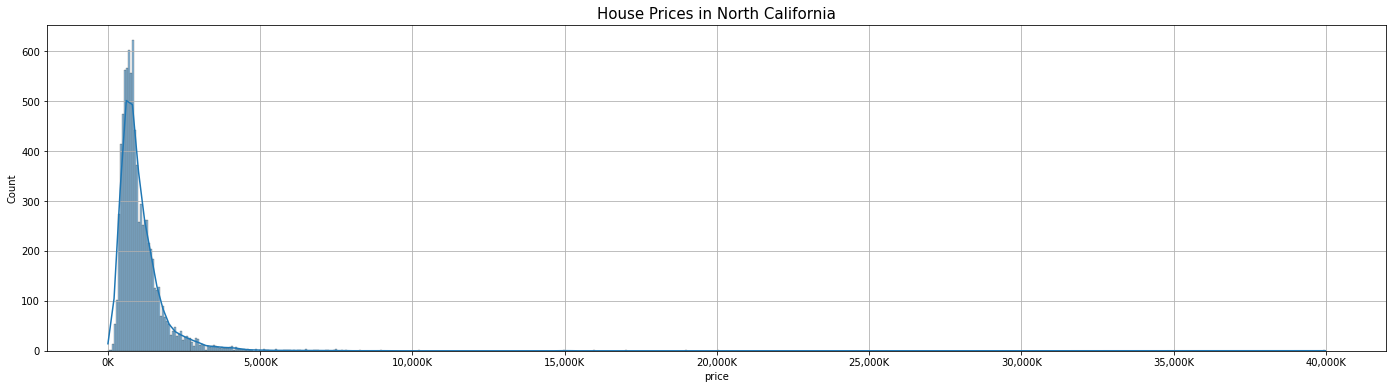

In [25]:
# Making a histogram of the price variable.
f, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x=df['price'], kde=True)
#ax.set(xlim = (5000000,40000000))
#ax.set(ylim = (0,20))
ax.set_title('House Prices in North California', fontsize=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
plt.grid(True)

Looks like we have a lot of prices > 5M US Dollars, let's zoom in

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


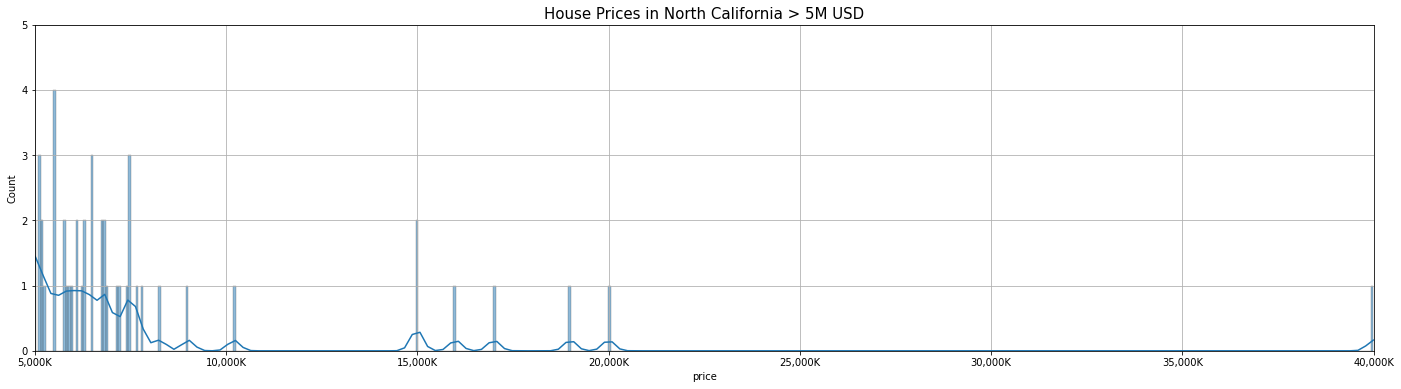

In [26]:
# Making a histogram of the price variable > 5M USD:
f, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x=df['price'], kde=True)
ax.set(xlim = (5000000,40000000))
ax.set(ylim = (0,5))
ax.set_title('House Prices in North California > 5M USD', fontsize=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
plt.grid(True)

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


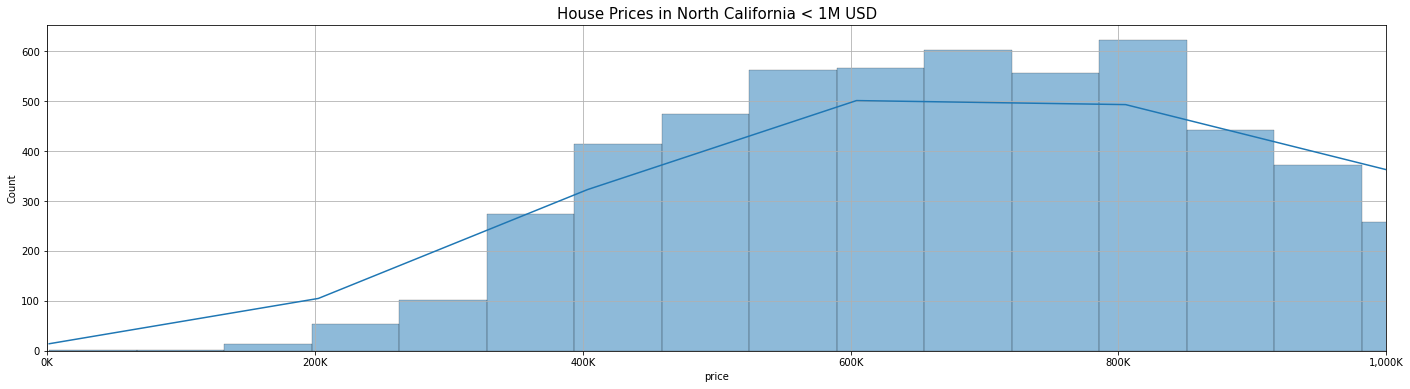

In [27]:
# Making a histogram of the price variable < 1M USD:
f, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x=df['price'], kde=True)
ax.set(xlim = (0,1000000))
#ax.set(ylim = (0,20))
ax.set_title('House Prices in North California < 1M USD', fontsize=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
plt.grid(True)

So looks like the majority of the house <code>**'price'**</code> between 500K-1M USD.

Now let's focus on the outliers ... from the above, apparently we have low houses count where the <code>**'price'**</code> < 350K and > 5M USD

In [28]:
# Explore house price > 5M USD:
df[df['price'] > 5000000]

address  \
75              2157 canosa ct, pleasanton, ca 94566   
389        3036 willow pass rd #1, concord, ca 94519   
2395         4051 el cerrito rd, palo alto, ca 94306   
2400              2188 byron st, palo alto, ca 94301   
2407            465 ruthven ave, palo alto, ca 94301   
2415             1173 orilla ct, los altos, ca 94022   
2419              741 homer ave, palo alto, ca 94301   
2426         928 laurel glen dr, palo alto, ca 94304   
2448             1965 cowper st, palo alto, ca 94301   
2452          369 churchill ave, palo alto, ca 94301   
2455           1327 waverley st, palo alto, ca 94301   
2459             79 crescent dr, palo alto, ca 94301   
2460        1039 university ave, palo alto, ca 94301   
2473              780 seale ave, palo alto, ca 94303   
2485                40 tevis pl, palo alto, ca 94301   
2493             1500 cowper st, palo alto, ca 94301   
2495                168 lois ln, palo alto, ca 94303   
2497         807 e greenwich pl, palo alto, ca 94303   
2498          1230 hamilton ave, palo alto, ca 94301   
2533  28110 story hill ln, los altos hills, ca 94022   
2541                38 tevis pl, palo alto, ca 94301   
2546           734 channing ave, palo alto, ca 94301   
2562             1501 bryant st, palo alto, ca 94301   
2565          262 rinconada ave, palo alto, ca 94301   
2587               70 jordan pl, palo alto, ca 94303   
2645              2350 byron st, palo alto, ca 94301   
2652             221 kipling st, palo alto, ca 94301   
2666           1550 waverley st, palo alto, ca 94301   
2667              417 seneca st, palo alto, ca 94301   
2701           601 melville ave, palo alto, ca 94301   
2706           80 san mateo dr, menlo park, ca 94025   
2709             2808 bryant st, palo alto, ca 94306   
2713           1450 waverley st, palo alto, ca 94301   
3745          3081 n main st, walnut creek, ca 94597   
3870                265 vernon st, oakland, ca 94610   
3887                  444 28th st, oakland, ca 94609   
7220                      140 wayne, alamo, ca 94507   
7258               7 country oak ln, alamo, ca 94507   
8275          644 wellsbury way, palo alto, ca 94306   
8293    14780 manuella rd, los altos hills, ca 94022   
8298              1740 oak ave, menlo park, ca 94025   
8337          1452 hamilton ave, palo alto, ca 94301   
8345            4246 pomona ave, palo alto, ca 94306   
8346              1241 dana ave, palo alto, ca 94301   
8351         323 santa rita ave, palo alto, ca 94301   
8359            1380 martin ave, palo alto, ca 94301   

                  property_type  zipcode     price  beds  baths   sqft  \
75    Single Family Residential    94566   6100000     5      6  10320   
389                 Condo/Co-op    94519   5795000     3      2   8514   
2395  Single Family Residential    94306   5105000     5      6   4002   
2400  Single Family Residential    94301   6280000     5      4   3257   
2407  Single Family Residential    94301   7125000     7      6   4416   
2415  Single Family Residential    94022   5900000     5      6   5469   
2419  Single Family Residential    94301   5795000     5      6   3746   
2426  Single Family Residential    94304  16000000     5      6  14000   
2448  Single Family Residential    94301   6793500     5      4   3652   
2452  Single Family Residential    94301  39988000     5      5  10877   
2455  Single Family Residential    94301   6270625     5      4   4078   
2459  Single Family Residential    94301   5500000     4      3   3488   
2460  Single Family Residential    94301   8280000     5      4   5617   
2473  Single Family Residential    94303   7450000     6      5   4689   
2485  Single Family Residential    94301   7500000     5      5   3866   
2493  Single Family Residential    94301  20000000     5      7   6980   
2495  Single Family Residential    94303   6510000     6      6   3847   
2497  Single Family Residential    94303   5180000     3      3   2321   
2498  

In [29]:
# Explore house price <= 200K USD:
df[df['price'] <= 200000].sort_values(by='price')

address              property_type  \
3023       19100 mines rd, livermore, ca 94550  Single Family Residential   
5733         361 s 20th st, richmond, ca 94804  Single Family Residential   
3841          1251 61st ave, oakland, ca 94621  Single Family Residential   
4169   2132 longview dr, san leandro, ca 94577  Single Family Residential   
637     1054 mohr ln unit b, concord, ca 94518                Condo/Co-op   
950          110 fabian way, concord, ca 94518  Single Family Residential   
4744         351 winton ave, hayward, ca 94544  Single Family Residential   
7998           11 e 19th st, antioch, ca 94509  Single Family Residential   
6255         175 manor dr, bay point, ca 94565  Single Family Residential   
8772     146 w bissell ave, richmond, ca 94801                Condo/Co-op   
5504    261 w chanslor ave, richmond, ca 94801                  Townhouse   
6746  1701 mahogany way #41, antioch, ca 94509                Condo/Co-op   
5697     340 w bissell ave, richmond, ca 94801                  Townhouse   
8823      12 w chanslor ct, richmond, ca 94801                  Townhouse   
8018  2200 lemontree way #1, antioch, ca 94509                Condo/Co-op   
3597   1 chorley walk, pleasant hill, ca 94523                Condo/Co-op   
5044  15837 maubert ave, san leandro, ca 94578  Single Family Residential   
7976  2005 san jose dr #166, antioch, ca 94509                Condo/Co-op   

      zipcode   price  beds  baths  sqft  lot_size  days_on_market  \
3023    94550    1600     4      2  2100         0              64   
5733    94804   80000     2      1   932      4200             111   
3841    94621   85000     2      1   948      4000             111   
4169    94577  135000     3      2  2095      7979             111   
637     94518  140000     2      1   873         0             111   
950     94518  150000     2      1   958      8515             111   
4744    94544  161000     3      1  1268      3784             111   
7998    94509  165000     3      1  1019      5866             341   
6255    94565  170000     2      1   918      5200             111   
8772    94801  178888     2      2   781       781             223   
5504    94801  186148     2      1   781       781             109   
6746    94509  189950     1      1   635         0              29   
5697    94801  190000     2      1   781         0              86   
8823    94801  190000     2      1   781         0             352   
8018    94509  192500     2      1   822         0             311   
3597    94523  196500     3      3  1708         0             111   
5044    94578  200000     2      1   960      7250             111   
7976    94509  200000     2      2   830         0             327   

      price_per_sqft  ...  property_age  school_rating  school_count  \
3023               1  ...            39              7            11   
5733              86  ...            69              1             8   
3841              90  ...            97              2            11   
4169              64  ...            57              4             8   
637              160  ...            52              4             6   
950              157  ...            73              4             6   
4744             127  ...            80              3            12   
7998             162  ...            79              3            16   
6255             185  ...            74              3            19   
8772             229  ...            79              2             6   
5504             238  ...            79              2             6   
6746             299  ...            40              3            16   
5697             243  ...            79              2             6   
8823             243  ...            79              2             6   
8018             234  ...            52              3            16   
3597             115  ...            38              6            12   
5044             208

19100 mines rd, livermore, ca 94550 Priced at 1,600 USD for 4 beds looks unreal, so after checking http://www.zillow.com, their estimate price on this property is 794,126 USD ... so let's update the price in the df.

In [30]:
# Let's update 19100 mines rd, livermore, ca 94550 price from 1600 to 794126:
df.at[3023,'price'] = 794126

In [31]:
#Let's house where price > 4M USD:
df[df['price'] > 4000000].sort_values(by='price')

address              property_type  \
8291         3195 south ct, palo alto, ca 94306  Single Family Residential   
2589       611 12 acres dr, los altos, ca 94022  Single Family Residential   
248   2908 w ruby hill dr, pleasanton, ca 94566  Single Family Residential   
2454      560 melville ave, palo alto, ca 94301  Single Family Residential   
2717     1181 hamilton ave, palo alto, ca 94301  Single Family Residential   
...                                         ...                        ...   
2426    928 laurel glen dr, palo alto, ca 94304  Single Family Residential   
2562        1501 bryant st, palo alto, ca 94301  Single Family Residential   
7258          7 country oak ln, alamo, ca 94507  Single Family Residential   
2493        1500 cowper st, palo alto, ca 94301  Single Family Residential   
2452     369 churchill ave, palo alto, ca 94301  Single Family Residential   

      zipcode     price  beds  baths   sqft  lot_size  days_on_market  \
8291    94306   4010000     5      4   2800      8000             191   
2589    94022   4016000     4      4   2907     11611             111   
248     94566   4050000     5      6   7686     40531              32   
2454    94301   4050000     4      3   2792      7210             123   
2717    94301   4065000     4      2   2881     11250              65   
...       ...       ...   ...    ...    ...       ...             ...   
2426    94304  16000000     5      6  14000    106894              25   
2562    94301  17000000     5      6   6024     12825              21   
7258    94507  19000000    10     18  21582    935669             107   
2493    94301  20000000     5      7   6980     15000             111   
2452    94301  39988000     5      5  10877     48925             111   

      price_per_sqft  ...  property_age  school_rating  school_count  \
8291            1432  ...            21              8             8   
2589            1381  ...            61              8             6   
248              527  ...            16              8             9   
2454            1451  ...            95              8             3   
2717            1411  ...            94              8             3   
...              ...  ...           ...            ...           ...   
2426            1143  ...            28              5             1   
2562            2822  ...             3              8             3   
7258             880  ...            11              8             4   
2493            2865  ...             2              8             3   
2452            3676  ...             4              8             3   

      bart_count  median_income  hotness_score  supply_score  demand_score  \
8291           0         117516          59.05         87.98         30.13   
2589           0         192435          50.61         69.26         31.96   
248            0         126782          80.07         79.57         80.57   
2454           0         142057          54.03         63.22         44.84   
2717           0         142057          54.03         63.22         44.84   
...          ...            ...            ...           ...           ...   
2426           0         107334          82.01         87.33         76.68   
2562           0         142057          54.03         63.22         44.84   
7258           0         171869          79.05         69.91         88.20   
2493           0         142057          54.03         63.22         44.84   
2452           0         142057          54.03         63.22         44.84   

      malls_count  university_count  
8291            1                 2  
2589            0                 0  
248             1                 0  
2454            1                 2  
2717            1                 2  
...           ...               ...  
2426            1                 2  
2562            1                 2  
7258            0                 0  
2493            1                 2  
2452  

In [32]:
# let's check how many houses where the price > 14M USD :)
df[df['price'] > 14000000]

address              property_type  \
2426  928 laurel glen dr, palo alto, ca 94304  Single Family Residential   
2452   369 churchill ave, palo alto, ca 94301  Single Family Residential   
2493      1500 cowper st, palo alto, ca 94301  Single Family Residential   
2562      1501 bryant st, palo alto, ca 94301  Single Family Residential   
2701    601 melville ave, palo alto, ca 94301  Single Family Residential   
3870         265 vernon st, oakland, ca 94610     Multi-Family (5+ Unit)   
7258        7 country oak ln, alamo, ca 94507  Single Family Residential   

      zipcode     price  beds  baths   sqft  lot_size  days_on_market  \
2426    94304  16000000     5      6  14000    106894              25   
2452    94301  39988000     5      5  10877     48925             111   
2493    94301  20000000     5      7   6980     15000             111   
2562    94301  17000000     5      6   6024     12825              21   
2701    94301  15000000     5      6   7823     18232             111   
3870    94610  14975000    47     44  36014     13313             111   
7258    94507  19000000    10     18  21582    935669             107   

      price_per_sqft  ...  property_age  school_rating  school_count  \
2426            1143  ...            28              5             1   
2452            3676  ...             4              8             3   
2493            2865  ...             2              8             3   
2562            2822  ...             3              8             3   
2701            1917  ...           116              8             3   
3870             416  ...            61              5             4   
7258             880  ...            11              8             4   

      bart_count  median_income  hotness_score  supply_score  demand_score  \
2426           0         107334          82.01         87.33         76.68   
2452           0         142057          54.03         63.22         44.84   
2493           0         142057          54.03         63.22         44.84   
2562           0         142057          54.03         63.22         44.84   
2701           0         142057          54.03         63.22         44.84   
3870           0          77764          64.37         87.73         41.01   
7258           0         171869          79.05         69.91         88.20   

      malls_count  university_count  
2426            1                 2  
2452            1                 2  
2493            1                 2  
2562            1                 2  
2701            1                 2  
3870            0                 7  
7258            0                 0  

[7 rows x 23 columns]

In [33]:
# let's drop houses where the price > 14M :)
df = df[df['price'] < 14000000]

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


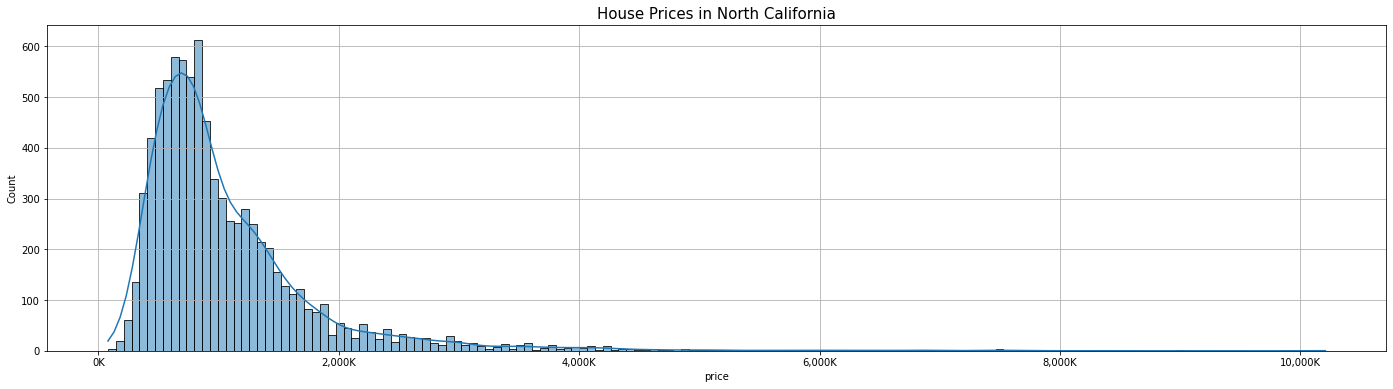

In [34]:
# Making a histogram of the price variable.
f, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x=df['price'], kde=True)
#ax.set(xlim = (5000000,40000000))
#ax.set(ylim = (0,20))
ax.set_title('House Prices in North California', fontsize=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
plt.grid(True)

Looks like everything else in <code>**price**</code> is valid :)

Now, let's look at <code>**'beds'**</code> which is a **Categorical Variable**

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


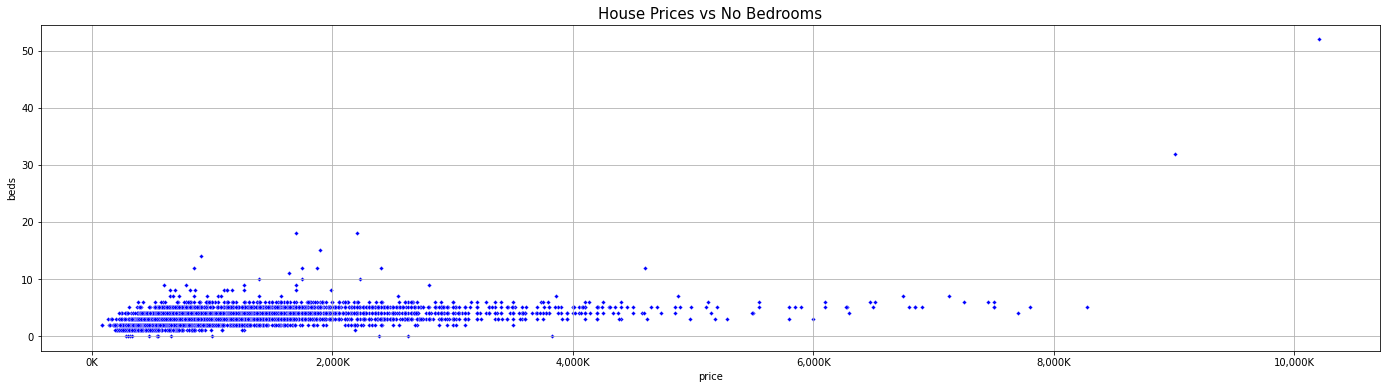

In [35]:
# Plot price against beds:
plt.figure(figsize=(24,6))
ax = sns.scatterplot(x='price',y='beds',data=df, s=10, color="b", marker="D")
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_title('House Prices vs No Bedrooms', fontsize=15)
ax.set_xticklabels(xlabels)
plt.grid(True)

C:\Users\aktha\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1195: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
C:\Users\aktha\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1196: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
C:\Users\aktha\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\aktha\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\aktha\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1195: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
C:\Users\aktha\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1196: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * 

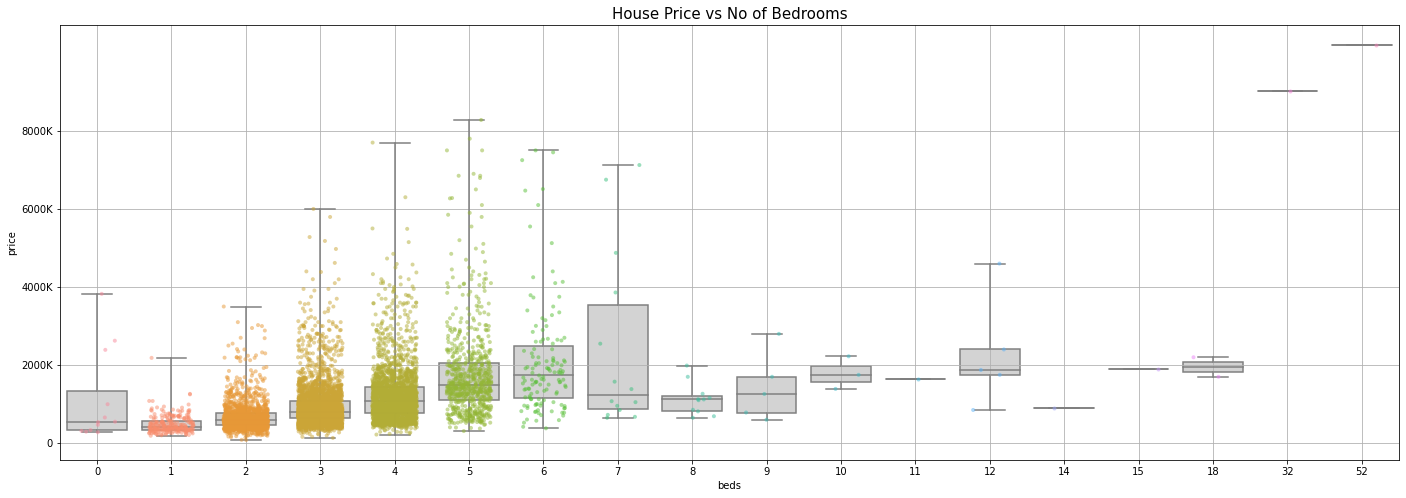

In [36]:
plt.figure(figsize=(24,8))
ax = sns.boxplot(x='beds', y='price', data=df, whis=np.inf, color="lightgrey")
#ax = sns.violinplot(x="school_rating", y="price", inner='quartile', data=df, color='lightgray')
#ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000]
plt.yticks([0, 2000000, 4000000, 6000000, 8000000], ['0', '2000K', '4000K', '6000K', '8000K'])
#plt.yscale('log')
sns.stripplot(x='beds', y='price', data=df, jitter=0.3, size=4, alpha=0.5)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('House Price vs No of Bedrooms', fontsize=15);

plt.grid(True)

Wow, Thats interesting, we have houses with more than 30 Bedrooms .. ok .. let's see what's going on!!!

In [37]:
#Now Let's examin "beds" > 30:
df[df['beds'] > 30]

address           property_type  zipcode  \
3745  3081 n main st, walnut creek, ca 94597  Multi-Family (5+ Unit)    94597   
3887          444 28th st, oakland, ca 94609  Multi-Family (5+ Unit)    94609   

         price  beds  baths   sqft  lot_size  days_on_market  price_per_sqft  \
3745  10208000    52      2  24648     48787               4             414   
3887   9012500    32     34  20596     21750             111             438   

      ...  property_age  school_rating  school_count  bart_count  \
3745  ...            56              8             2           1   
3887  ...            66              3             5           1   

      median_income  hotness_score  supply_score  demand_score  malls_count  \
3745          92676          83.36         91.13         75.58            1   
3887          59366          60.33         87.27         33.40            0   

      university_count  
3745                 0  
3887                 7  

[2 rows x 23 columns]

Alright, so looks we have apartments buildings in the df, so let's check how many?

In [38]:
#let's check property_type ditribution:
df['property_type'].value_counts()

Single Family Residential    6218
Condo/Co-op                  1222
Townhouse                     740
Multi-Family (2-4 Unit)       149
Multi-Family (5+ Unit)         15
Name: property_type, dtype: int64

hmm... All high number of Beds are associated with </code>**"property_type"**</code>: Multi-Family (apartments buildings) and as we can see above we have total of 165 in total **so let's drop "Multi-Family (2-4 Unit)" & "Multi-Family (5+ Unit)"**

In [39]:
# Let's drop "Multi-Family (2-4 Unit)" & "Multi-Family (5+ Unit)":
df = df[(df['property_type'] != 'Multi-Family (2-4 Unit)') & (df['property_type'] != 'Multi-Family (5+ Unit)')]
df['property_type'].value_counts()

Single Family Residential    6218
Condo/Co-op                  1222
Townhouse                     740
Name: property_type, dtype: int64

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


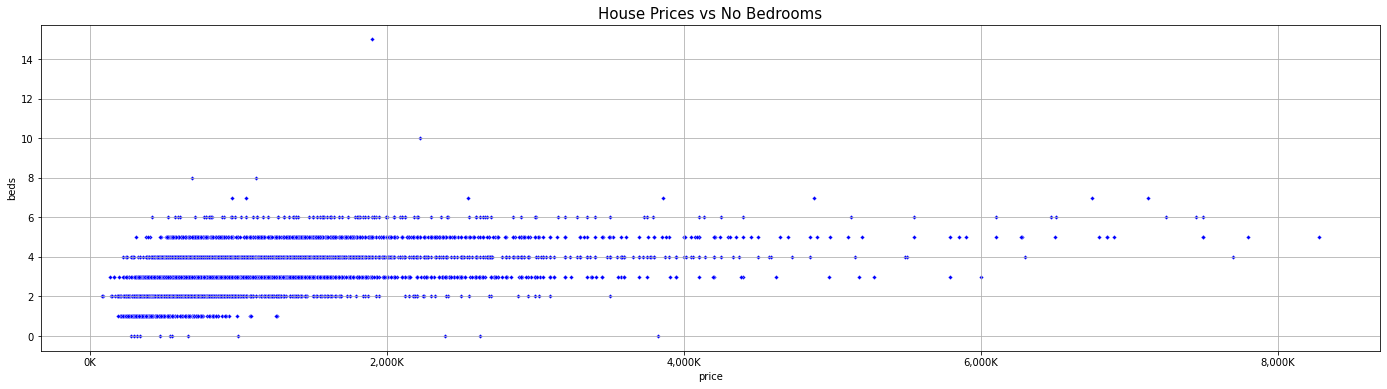

In [40]:
# let's Plot again price against beds:
plt.figure(figsize=(24,6))
ax = sns.scatterplot(x='price',y='beds',data=df, s=10, color="b", marker="D")
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_title('House Prices vs No Bedrooms', fontsize=15)
ax.set_xticklabels(xlabels)
plt.grid(True)

In [41]:
#Let's check house where we have beds=0:
df[df['beds'] == 0]

address              property_type  \
1254       224 corriedale ct, danville, ca 94506  Single Family Residential   
2684          795 cereza dr, palo alto, ca 94306  Single Family Residential   
3506  8135 camelback pl, pleasant hill, ca 94523                Condo/Co-op   
3781     3050 college ave #4, berkeley, ca 94705                Condo/Co-op   
3921     455 crescent st #313, oakland, ca 94610                Condo/Co-op   
3986    1500 park ave #332, emeryville, ca 94608                Condo/Co-op   
5124       1835 spruce st #2, berkeley, ca 94709                Condo/Co-op   
5173          2410 prince st, berkeley, ca 94705  Single Family Residential   
5229    2550 dana st unit 6g, berkeley, ca 94704                Condo/Co-op   
5308      2842 woolsey st #4, berkeley, ca 94705                Condo/Co-op   
5723      1650 san benito st, richmond, ca 94804  Single Family Residential   
8292            540 pine ln, los altos, ca 94022  Single Family Residential   

      zipcode    price  beds  baths  sqft  lot_size  days_on_market  \
1254    94506  2390000     0      2     0     13670             111   
2684    94306  2625000     0      1  1092      8250              35   
3506    94523   315000     0      1   537         0             175   
3781    94705   335000     0      1   350         0             171   
3921    94610   279000     0      1   504         0             161   
3986    94608   470000     0      1   634         0              65   
5124    94709   538000     0      1   557         0              92   
5173    94705   997000     0      1   784      2893             107   
5229    94704   295000     0      1   480         0             101   
5308    94705   658000     0      1   644      6132             130   
5723    94804   550000     0      2   454      2500             106   
8292    94022  3825000     0      1     1         1             339   

      price_per_sqft  ...  property_age  school_rating  school_count  \
1254             513  ...             3              9             4   
2684            2404  ...            72              8             8   
3506             587  ...            40              6            12   
3781             957  ...           103              7             4   
3921             554  ...            53              5             4   
3986             741  ...           100              3             3   
5124             966  ...            93              8             1   
5173            1272  ...            86              7             4   
5229             615  ...            59              6             3   
5308            1022  ...           104              7             4   
5723            1211  ...            91              1             8   
8292         3825000  ...            52              8             6   

      bart_count  median_income  hotness_score  supply_score  demand_score  \
1254           0         185581          84.19         80.92         87.45   
2684           0         117516          59.05         87.98         30.13   
3506           0          86014          91.35         92.93         89.78   
3781           0         101653          66.98         76.02         57.95   
3921           0          77764          64.37         87.73         41.01   
3986           0          58924          55.96         78.58         33.34   
5124           0          62284          82.01         87.33         76.68   
5173           0         101653          66.98         76.02         57.95   
5229           1          32639          82.01         87.33         76.68   
5308           0         101653          66.98         76.02         57.95   
5723           0          52166          80.29         94.58         66.01   
8292           0         192435          50.61         69.26         31.96   

      malls_count  university_count  
1254            1                 0  
2684            1                 2  
3506            0      

In [42]:
# Let's check address 224 corriedale ct, danville, ca 94506:
df[df['address'] == '224 corriedale ct, danville, ca 94506'].T

1254
address           224 corriedale ct, danville, ca 94506
property_type                 Single Family Residential
zipcode                                           94506
price                                           2390000
beds                                                  0
baths                                                 2
sqft                                                  0
lot_size                                          13670
days_on_market                                      111
price_per_sqft                                      513
hoa_month                                             0
lat                                               37.79
long                                            -121.88
property_age                                          3
school_rating                                         9
school_count                                          4
bart_count                                            0
median_income                                    185581
hotness_score                                     84.19
supply_score                                      80.92
demand_score                                      87.45
malls_count                                           1
university_count                                      0

lots of issues in this house, let's fix them!!

In [43]:
# Let's Fix the wrong values at address 224 corriedale ct, danville, ca 94506:
df.at[1254,'beds'] = 5
df.at[1254,'baths'] = 6
df.at[1254,'sqft'] = 4825
df.at[1254,'hoa_month'] = 160
df[df['address'] == '224 corriedale ct, danville, ca 94506'].T

1254
address           224 corriedale ct, danville, ca 94506
property_type                 Single Family Residential
zipcode                                           94506
price                                           2390000
beds                                                  5
baths                                                 6
sqft                                               4825
lot_size                                          13670
days_on_market                                      111
price_per_sqft                                      513
hoa_month                                           160
lat                                               37.79
long                                            -121.88
property_age                                          3
school_rating                                         9
school_count                                          4
bart_count                                            0
median_income                                    185581
hotness_score                                     84.19
supply_score                                      80.92
demand_score                                      87.45
malls_count                                           1
university_count                                      0

In [44]:
# Let's check address 540 pine ln, los altos, ca 94022:
df[df['address'] == '540 pine ln, los altos, ca 94022'].T

8292
address           540 pine ln, los altos, ca 94022
property_type            Single Family Residential
zipcode                                      94022
price                                      3825000
beds                                             0
baths                                            1
sqft                                             1
lot_size                                         1
days_on_market                                 339
price_per_sqft                             3825000
hoa_month                                        0
lat                                          37.39
long                                       -122.13
property_age                                    52
school_rating                                    8
school_count                                     6
bart_count                                       0
median_income                               192435
hotness_score                                50.61
supply_score                                 69.26
demand_score                                 31.96
malls_count                                      0
university_count                                 0

In [45]:
# Let's Fix the wrong values at address 540 pine ln, los altos, ca 94022:
df.at[8292,'beds'] = 5
df.at[8292,'baths'] = 4
df.at[8292,'sqft'] = 3644
df.at[8292,'lot_size'] = 26710
df.at[8292,'price_per_sqft'] = 1050
df[df['address'] == '540 pine ln, los altos, ca 94022'].T

8292
address           540 pine ln, los altos, ca 94022
property_type            Single Family Residential
zipcode                                      94022
price                                      3825000
beds                                             5
baths                                            4
sqft                                          3644
lot_size                                     26710
days_on_market                                 339
price_per_sqft                                1050
hoa_month                                        0
lat                                          37.39
long                                       -122.13
property_age                                    52
school_rating                                    8
school_count                                     6
bart_count                                       0
median_income                               192435
hotness_score                                50.61
supply_score                                 69.26
demand_score                                 31.96
malls_count                                      0
university_count                                 0

In [46]:
df.at[5173,'beds'] = 1

In [47]:
# Let's check how many houses left with 0 beds:
df[df['beds'] == 0]

address              property_type  \
2684          795 cereza dr, palo alto, ca 94306  Single Family Residential   
3506  8135 camelback pl, pleasant hill, ca 94523                Condo/Co-op   
3781     3050 college ave #4, berkeley, ca 94705                Condo/Co-op   
3921     455 crescent st #313, oakland, ca 94610                Condo/Co-op   
3986    1500 park ave #332, emeryville, ca 94608                Condo/Co-op   
5124       1835 spruce st #2, berkeley, ca 94709                Condo/Co-op   
5229    2550 dana st unit 6g, berkeley, ca 94704                Condo/Co-op   
5308      2842 woolsey st #4, berkeley, ca 94705                Condo/Co-op   
5723      1650 san benito st, richmond, ca 94804  Single Family Residential   

      zipcode    price  beds  baths  sqft  lot_size  days_on_market  \
2684    94306  2625000     0      1  1092      8250              35   
3506    94523   315000     0      1   537         0             175   
3781    94705   335000     0      1   350         0             171   
3921    94610   279000     0      1   504         0             161   
3986    94608   470000     0      1   634         0              65   
5124    94709   538000     0      1   557         0              92   
5229    94704   295000     0      1   480         0             101   
5308    94705   658000     0      1   644      6132             130   
5723    94804   550000     0      2   454      2500             106   

      price_per_sqft  ...  property_age  school_rating  school_count  \
2684            2404  ...            72              8             8   
3506             587  ...            40              6            12   
3781             957  ...           103              7             4   
3921             554  ...            53              5             4   
3986             741  ...           100              3             3   
5124             966  ...            93              8             1   
5229             615  ...            59              6             3   
5308            1022  ...           104              7             4   
5723            1211  ...            91              1             8   

      bart_count  median_income  hotness_score  supply_score  demand_score  \
2684           0         117516          59.05         87.98         30.13   
3506           0          86014          91.35         92.93         89.78   
3781           0         101653          66.98         76.02         57.95   
3921           0          77764          64.37         87.73         41.01   
3986           0          58924          55.96         78.58         33.34   
5124           0          62284          82.01         87.33         76.68   
5229           1          32639          82.01         87.33         76.68   
5308           0         101653          66.98         76.02         57.95   
5723           0          52166          80.29         94.58         66.01   

      malls_count  university_count  
2684            1                 2  
3506            0                 1  
3781            0                10  
3921            0                 7  
3986            1                 1  
5124            0                10  
5229            0                10  
5308            0                10  
5723            1                 0  

[9 rows x 23 columns]

let's drop these 9 Houses

In [48]:
#let's keep only houses with beds>0:
df = df[df['beds'] > 0]

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


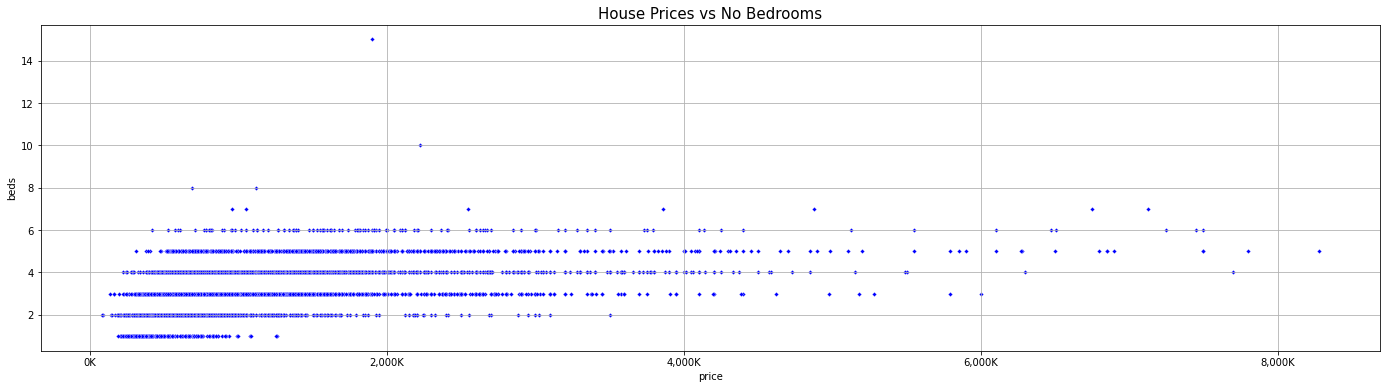

In [49]:
# Let's Plot again price against beds:
plt.figure(figsize=(24,6))
ax = sns.scatterplot(x='price',y='beds',data=df, s=10, color="b", marker="D")
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_title('House Prices vs No Bedrooms', fontsize=15)
ax.set_xticklabels(xlabels)
plt.grid(True)

Now looks much much better!!!

Since this is a **Categorical Variable** let's plot <code>**'beds'**</code> using **boxplot and stripplot.**


C:\Users\aktha\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1195: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
C:\Users\aktha\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1196: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
C:\Users\aktha\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\aktha\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\aktha\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1195: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
C:\Users\aktha\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1196: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * 

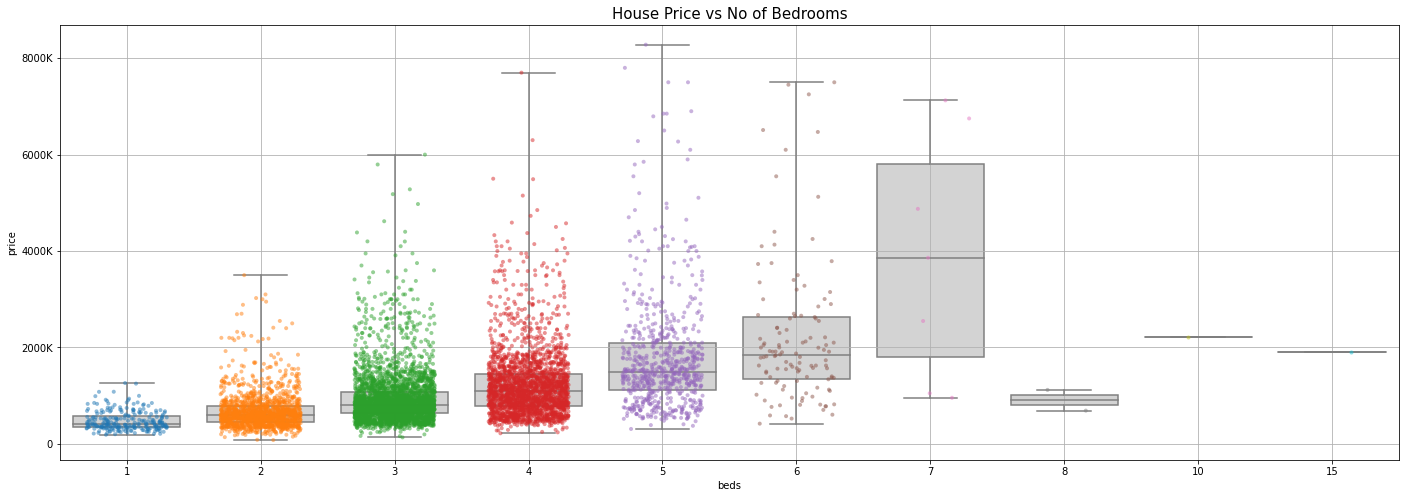

In [50]:
plt.figure(figsize=(24,8))
ax = sns.boxplot(x='beds', y='price', data=df, whis=np.inf, color="lightgrey")
#ax = sns.violinplot(x="beds", y="price", inner='quartile', data=df, color='lightgray')
#ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000]
plt.yticks([0, 2000000, 4000000, 6000000, 8000000], ['0', '2000K', '4000K', '6000K', '8000K'])
#plt.yscale('log')
sns.stripplot(x='beds', y='price', data=df, jitter=0.3, size=4, alpha=0.5)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('House Price vs No of Bedrooms', fontsize=15);

plt.grid(True)

let's add log scale on y-axis to improve visibility

C:\Users\aktha\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1195: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
C:\Users\aktha\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1196: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
C:\Users\aktha\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\aktha\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\aktha\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1195: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
C:\Users\aktha\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1196: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * 

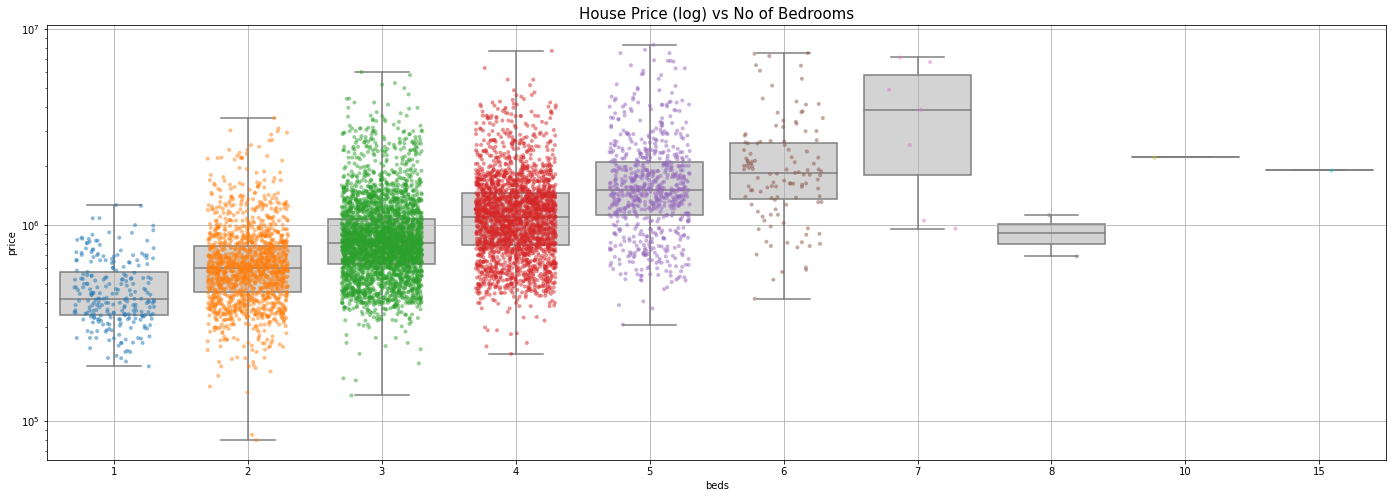

In [51]:
plt.figure(figsize=(24,8))
ax = sns.boxplot(x='beds', y='price', data=df, whis=np.inf, color="lightgrey")
#ax = sns.violinplot(x="beds", y="price", inner='quartile', data=df, color='lightgray')
#ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000]
plt.yticks([0, 2000000, 4000000, 6000000, 8000000], ['0', '2000K', '4000K', '6000K', '8000K'])
#plt.yscale('log')
sns.stripplot(x='beds', y='price', data=df, jitter=0.3, size=4, alpha=0.5)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('House Price (log) vs No of Bedrooms', fontsize=15);
plt.yscale('log')
plt.grid(True)

As you can see, when plotting categorical variable using both **boxplot and stripplot.** can really help us:
* To identify outliers which may impact our prediction. so from looking at above we can see that we need more investigation in all houses where we have <code>**'beds'**</code> >=8
* we can see that we have a poistive correlation between <code>**'price'**</code> and <code>**'beds'**</code>

In [52]:
df[df['beds'] >=8]

address              property_type  \
5232      2225 blake st, berkeley, ca 94704  Single Family Residential   
7393         512 hemme ave, alamo, ca 94507  Single Family Residential   
7764   341 boyd rd, pleasant hill, ca 94523  Single Family Residential   
7828  2099 geary rd, walnut creek, ca 94597  Single Family Residential   

      zipcode    price  beds  baths  sqft  lot_size  days_on_market  \
5232    94704  1900000    15      6  4153      6750             109   
7393    94507  2225000    10      7  7833     62907             257   
7764    94523  1120000     8      4  3100     11761             198   
7828    94597   690000     8      3  2935      8500             359   

      price_per_sqft  ...  property_age  school_rating  school_count  \
5232             458  ...           126              6             3   
7393             284  ...            91              8             4   
7764             361  ...            65              6            12   
7828             235  ...            70              8             2   

      bart_count  median_income  hotness_score  supply_score  demand_score  \
5232           1          32639          82.01         87.33         76.68   
7393           0         171869          79.05         69.91         88.20   
7764           0          86014          91.35         92.93         89.78   
7828           1          92676          83.36         91.13         75.58   

      malls_count  university_count  
5232            0                10  
7393            0                 0  
7764            0                 1  
7828            1                 0  

[4 rows x 23 columns]

In [53]:
df[df['beds'] ==7]

address              property_type  \
146         446 mares ct, pleasanton, ca 94566  Single Family Residential   
948         1200 mcewing ct, concord, ca 94521  Single Family Residential   
2407      465 ruthven ave, palo alto, ca 94301  Single Family Residential   
4699         2721 hidden ln, hayward, ca 94541  Single Family Residential   
5350  1960 san antonio ave, berkeley, ca 94707  Single Family Residential   
5380     1830 berkeley way, berkeley, ca 94703  Single Family Residential   
8298        1740 oak ave, menlo park, ca 94025  Single Family Residential   

      zipcode    price  beds  baths   sqft  lot_size  days_on_market  \
146     94566  3860000     7      8   8005     56650              91   
948     94521  1050000     7      8   3267      9086             118   
2407    94301  7125000     7      6   4416      7799             111   
4699    94541   956250     7      4   2085     17150             147   
5350    94707  4875000     7      6  12000    130680              46   
5380    94703  2548900     7      6   3460      5611              60   
8298    94025  6750000     7      6   5415     11614             348   

      price_per_sqft  ...  property_age  school_rating  school_count  \
146              482  ...            19              8             9   
948              321  ...            55              5             9   
2407            1613  ...             1              8             3   
4699             459  ...            73              3            12   
5350             406  ...           109              6             2   
5380             737  ...           125              6             3   
8298            1247  ...             6              5             6   

      bart_count  median_income  hotness_score  supply_score  demand_score  \
146            0         126782          80.07         79.57         80.57   
948            0          89314          92.29         92.30         92.28   
2407           0         142057          54.03         63.22         44.84   
4699           1          60963          87.80         85.92         89.68   
5350           0         143556          82.01         87.33         76.68   
5380           1          61719          61.62         87.26         35.98   
8298           0         125407          55.30         80.53         30.06   

      malls_count  university_count  
146             1                 0  
948             1                 0  
2407            1                 2  
4699            1                 2  
5350            0                10  
5380            0                10  
8298            0                 0  

[7 rows x 23 columns]

After investigation looks like the data is valid, so let's keep as is!
<code>**'beds'**</code> is good for now/ :)


Let's look at <code>**'Baths'**</code> which is a **Categorical Variable**

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


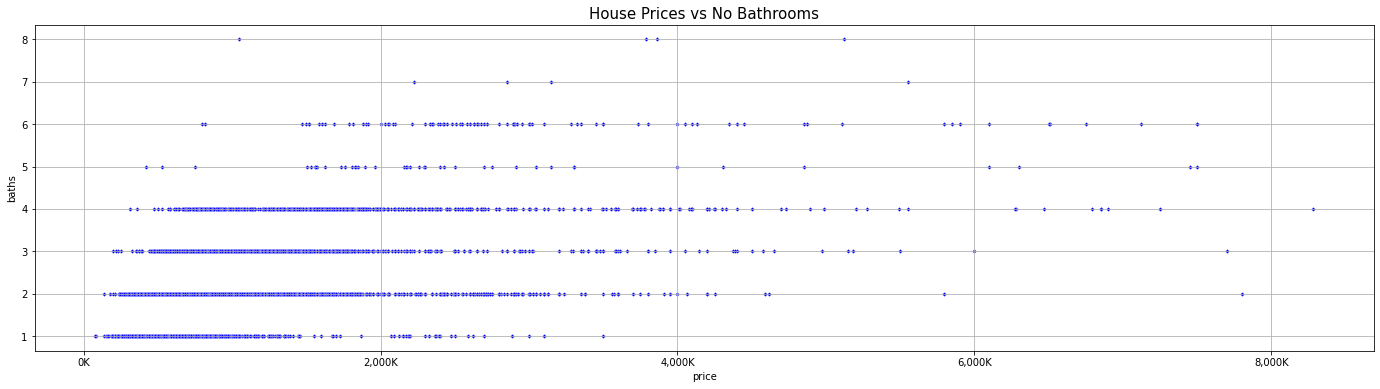

In [54]:
# Plot price against baths:
plt.figure(figsize=(24,6))
ax = sns.scatterplot(x='price',y='baths',data=df, s=10, color="b", marker="D")
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_title('House Prices vs No Bathrooms', fontsize=15)
ax.set_xticklabels(xlabels)
plt.grid(True)

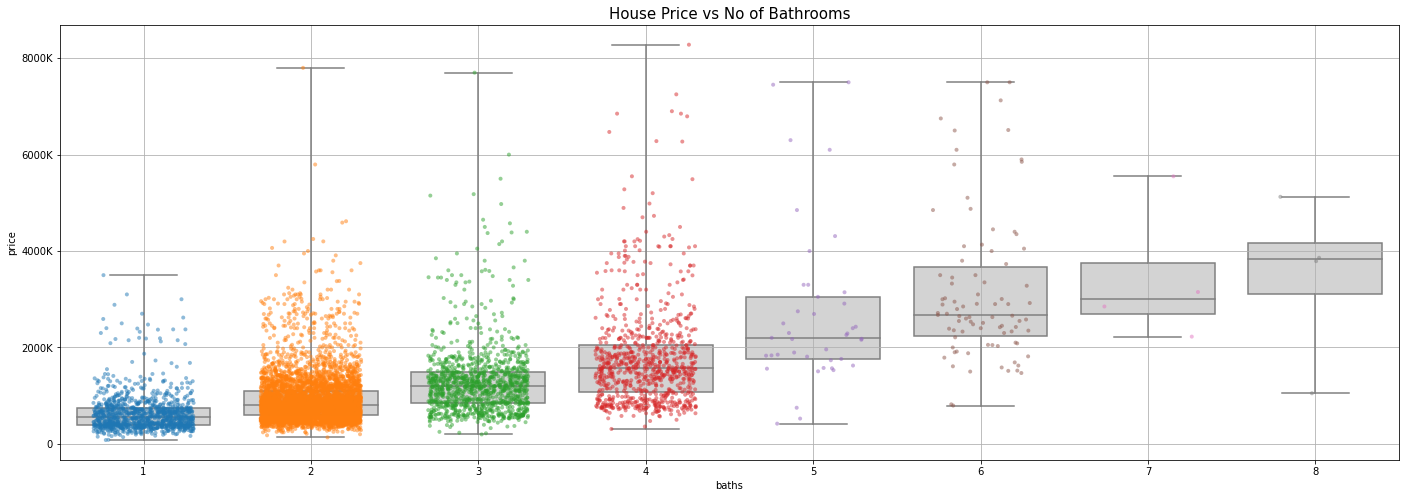

In [55]:
plt.figure(figsize=(24,8))
ax = sns.boxplot(x='baths', y='price', data=df, whis=np.inf, color="lightgrey")
#ax = sns.violinplot(x="baths", y="price", inner='quartile', data=df, color='lightgray')
#ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000]
plt.yticks([0, 2000000, 4000000, 6000000, 8000000], ['0', '2000K', '4000K', '6000K', '8000K'])
#plt.yscale('log')
sns.stripplot(x='baths', y='price', data=df, jitter=0.3, size=4, alpha=0.5)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('House Price vs No of Bathrooms', fontsize=15);
plt.grid(True)

let's add log scale on y-axis to improve visibility

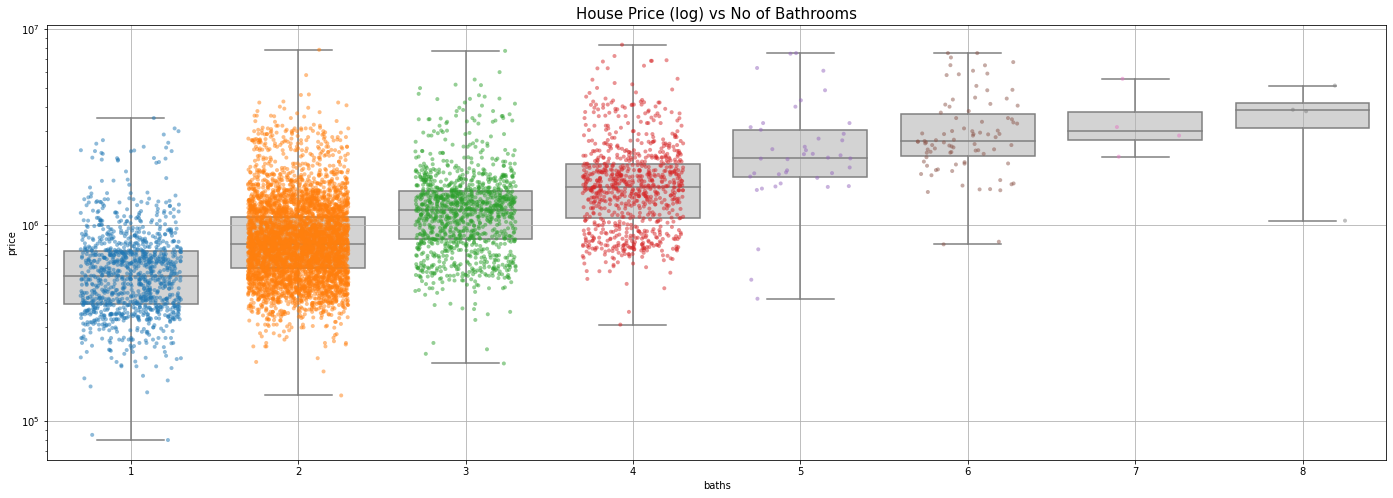

In [56]:
plt.figure(figsize=(24,8))
ax = sns.boxplot(x='baths', y='price', data=df, whis=np.inf, color="lightgrey")
#ax = sns.violinplot(x="baths", y="price", inner='quartile', data=df, color='lightgray')
#ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000]
plt.yticks([0, 2000000, 4000000, 6000000, 8000000], ['0', '2000K', '4000K', '6000K', '8000K'])
#plt.yscale('log')
sns.stripplot(x='baths', y='price', data=df, jitter=0.3, size=4, alpha=0.5)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.yscale('log')
ax.set_title('House Price (log) vs No of Bathrooms', fontsize=15);
plt.grid(True)

Looks like data is valid for <code>**'Baths'**</code> and also we can see that we have a positive correlation between <code>**'price'**</code> and <code>**'Baths'**</code>

Now, let's look at <code>**'sqft'**</code> which is a **Numerical Variable**

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


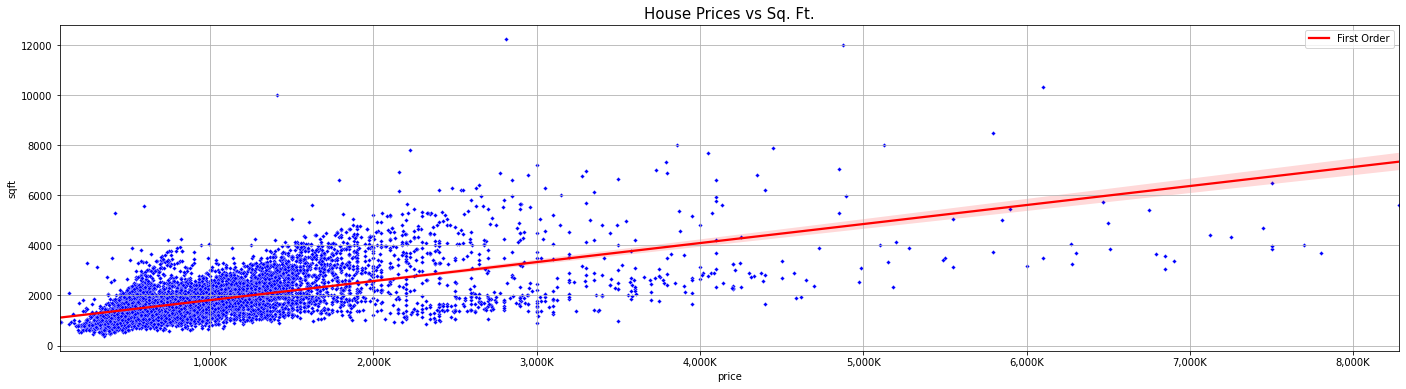

In [57]:
# Plot price against sqft:
plt.figure(figsize=(24,6))
ax = sns.scatterplot(x='price',y='sqft',data=df, s=10, color="b", marker="D")
# The function sns.regplot() uses the argument scatter=None to prevent plotting the scatter plot points again:
sns.regplot(x='price', y='sqft', data=df, scatter=None, color='red', label='First Order')
# Plot in green a linear regression of order 2 between 'density' and 'fixed.acidity':
#sns.regplot(x='price', y='sqft', data=df, scatter=None, order=2, color='green', label='Second Order')
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_title('House Prices vs Sq. Ft.', fontsize=15)
ax.set_xticklabels(xlabels)
plt.legend(loc='upper right')
plt.grid(True)

Looks like data is valid for  <code>**'sqft'**</code> and also we can see that we have a positive correlation between <code>**'price'**</code> and  <code>**'sqft'**</code>

Now, let's look at <code>**'price_per_sqft'**</code> which is a **Numerical Variable**

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


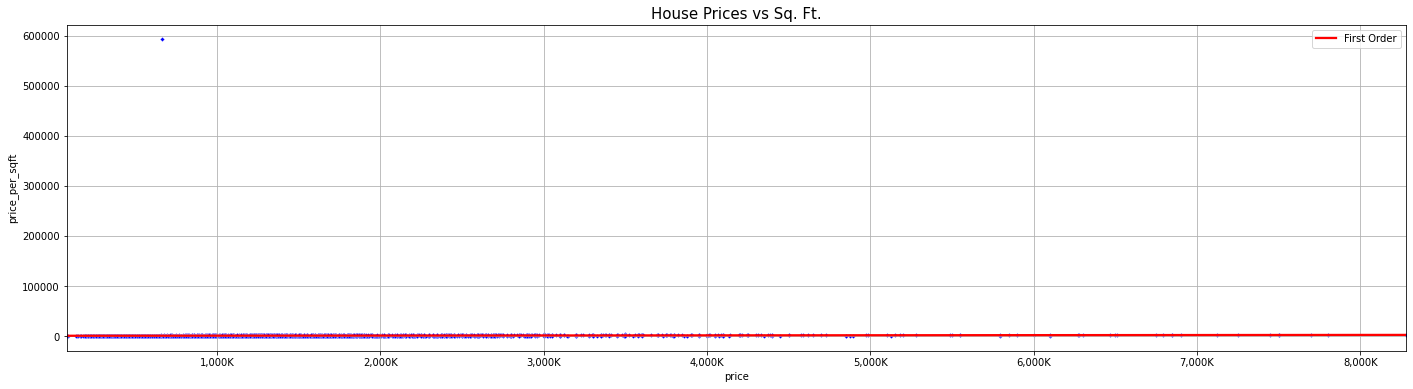

In [58]:
# Plot price against price_per_sqft:
plt.figure(figsize=(24,6))
ax = sns.scatterplot(x='price',y='price_per_sqft',data=df, s=10, color="b", marker="D")
# The function sns.regplot() uses the argument scatter=None to prevent plotting the scatter plot points again:
sns.regplot(x='price', y='price_per_sqft', data=df, scatter=None, color='red', label='First Order')
# Plot in green a linear regression of order 2 between 'density' and 'fixed.acidity':
#sns.regplot(x='price', y='price_per_sqft', data=df, scatter=None, order=2, color='green', label='Second Order')
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_title('House Prices vs Sq. Ft.', fontsize=15)
ax.set_xticklabels(xlabels)
plt.legend(loc='upper right')
plt.grid(True)

Alright, looks like we have something wrong here, let's investigate !!

In [59]:
df[df['price_per_sqft'] > 100000]

address              property_type  \
5556  342 shirley vis, el sobrante, ca 94803  Single Family Residential   

      zipcode   price  beds  baths  sqft  lot_size  days_on_market  \
5556    94803  665000     3      2  1122      6000              11   

      price_per_sqft  ...  property_age  school_rating  school_count  \
5556          592692  ...            65              3             7   

      bart_count  median_income  hotness_score  supply_score  demand_score  \
5556           0          80272          87.24         86.68         87.79   

      malls_count  university_count  
5556            0                 0  

[1 rows x 23 columns]

After checking the house on zillow, <code>price_per_sqft</code> should be 593 instead of 592692 :)

In [60]:
# Let's fix price_per_sqft at 342 shirley vis, el sobrante, ca 94803:
df.at[5556,'price_per_sqft'] = 593

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


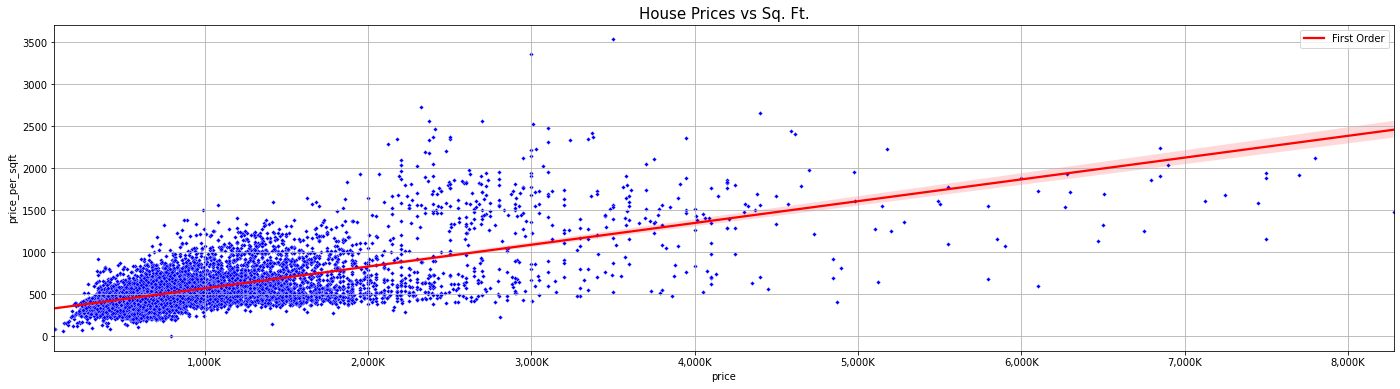

In [61]:
# Plot price against price_per_sqft:
plt.figure(figsize=(24,6))
ax = sns.scatterplot(x='price',y='price_per_sqft',data=df, s=10, color="b", marker="D")
# The function sns.regplot() uses the argument scatter=None to prevent plotting the scatter plot points again:
sns.regplot(x='price', y='price_per_sqft', data=df, scatter=None, color='red', label='First Order')
# Plot in green a linear regression of order 2 between 'density' and 'fixed.acidity':
#sns.regplot(x='price', y='price_per_sqft', data=df, scatter=None, order=2, color='green', label='Second Order')
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_title('House Prices vs Sq. Ft.', fontsize=15)
ax.set_xticklabels(xlabels)
plt.legend(loc='upper right')
plt.grid(True)

Ok, now the data looks much much better!!!!

Let's jump to <code>**'lot_size'**</code> which is a **Numerical Variable**

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


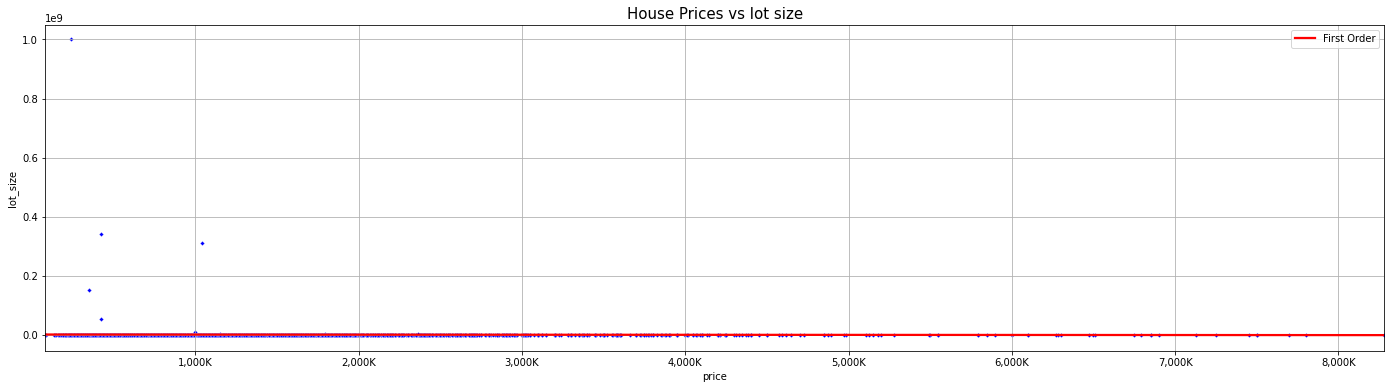

In [62]:
# Plot price against lot_size:
plt.figure(figsize=(24,6))
ax = sns.scatterplot(x='price',y='lot_size',data=df, s=10, color="b", marker="D")
# The function sns.regplot() uses the argument scatter=None to prevent plotting the scatter plot points again:
sns.regplot(x='price', y='lot_size', data=df, scatter=None, color='red', label='First Order')
# Plot in green a linear regression of order 2 between 'density' and 'fixed.acidity':
#sns.regplot(x='price', y='lot_size', data=df, scatter=None, order=2, color='green', label='Second Order')
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_title('House Prices vs lot size', fontsize=15)
ax.set_xticklabels(xlabels)
plt.legend(loc='upper right')
plt.grid(True)

That's interesting ... so we have 163 house where we have abnormal <code>**'lot_size'**</code>, so for these house, let's take the median() of <code>**'lot_size'**</code> and impute the result in all houses where <code>**'lot_size'**</code> > 40000

In [63]:
#df[df['lot_size']].sort_values(by='lot_size').head(20)
df[df['lot_size'] > 40000].sort_values(by='lot_size', ascending=False)

address              property_type  \
7886   515 lancaster cir #246, bay point, ca 94565                Condo/Co-op   
6133            206 anchor dr, bay point, ca 94565  Single Family Residential   
2294        4734 mangrum dr, santa clara, ca 95054  Single Family Residential   
6742   1720 magnolia way unit a, antioch, ca 94509                  Townhouse   
3505    321 scottsdale rd, pleasant hill, ca 94523                  Townhouse   
...                                            ...                        ...   
4732             1127 garin ave, hayward, ca 94544  Single Family Residential   
8419        3239 kempton ave #7, oakland, ca 94611                Condo/Co-op   
8293  14780 manuella rd, los altos hills, ca 94022  Single Family Residential   
999       1069 saint francis dr, concord, ca 94518  Single Family Residential   
2536           2987 alexis dr, palo alto, ca 94304  Single Family Residential   

      zipcode    price  beds  baths  sqft   lot_size  days_on_market  \
7886    94565   240000     2      2   884  999999999             307   
6133    94565   420000     3      2  1230  339768000             104   
2294    95054  1040000     3      2  1095  310365000             136   
6742    94509   349000     3      2  1154  149585040             151   
3505    94523   425000     2      2  1464   52272000             111   
...       ...      ...   ...    ...   ...        ...             ...   
4732    94544  1150000     4      3  2464      40261             151   
8419    94611   920000     3      1  1353      40145             291   
8293    94022  5851000     5      6  5036      40075             300   
999     94518   953000     4      2  2560      40050              20   
2536    94304  3280000     4      3  3184      40003             111   

      price_per_sqft  ...  property_age  school_rating  school_count  \
7886             271  ...            32              3            19   
6133             513  ...            48              3            19   
2294             513  ...            61              6             4   
6742             513  ...            42              3            16   
3505             290  ...            40              6            12   
...              ...  ...           ...            ...           ...   
4732             467  ...            68              3            12   
8419             680  ...            94              7            12   
8293            1162  ...            91              8             6   
999              372  ...            45              4             6   
2536            1030  ...            58              5             1   

      bart_count  median_income  hotness_score  supply_score  demand_score  \
7886           2          58825          86.54         87.99         85.09   
6133           2          58825          86.54         87.99         85.09   
2294           0         123048          47.71         81.97         13.45   
6742           1          57253          87.72         85.89         89.55   
3505           0          86014          91.35         92.93         89.78   
...          ...            ...            ...           ...           ...   
4732           1          62863          84.10         89.19         79.00   
8419           0         113278          81.98         90.77         73.19   
8293           0         192435          50.61         69.26         31.96   
999            0          76911          90.40         88.95         91.85   
2536           0         107334          82.01         87.33         76.68   

      malls_count  university_count  
7886            0                 0  
6133            0                 0  
2294            0                 1  
6742            1                 0  
3505            0                 1  
...           ...               ...  
4732            1                 2  
8419            0                 7  
8293            0                 0  
999             1      

In [64]:
# Let's take the median of 'lot_size':
df['lot_size'].median()

5760.0

In [65]:
#Now, let's impute df['lot_size'].median() in all houses where df['lot_size'] > 40000:
df.loc[df['lot_size'] > 40000, 'lot_size'] = df['lot_size'].median()

#let's comfirm the issue is fixed:
df[df['address'] == '515 lancaster cir #246, bay point, ca 94565'].T

7886
address           515 lancaster cir #246, bay point, ca 94565
property_type                                     Condo/Co-op
zipcode                                                 94565
price                                                  240000
beds                                                        2
baths                                                       2
sqft                                                      884
lot_size                                                 5760
days_on_market                                            307
price_per_sqft                                            271
hoa_month                                                 450
lat                                                     38.02
long                                                  -121.95
property_age                                               32
school_rating                                               3
school_count                                               19
bart_count                                                  2
median_income                                           58825
hotness_score                                           86.54
supply_score                                            87.99
demand_score                                            85.09
malls_count                                                 0
university_count                                            0

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


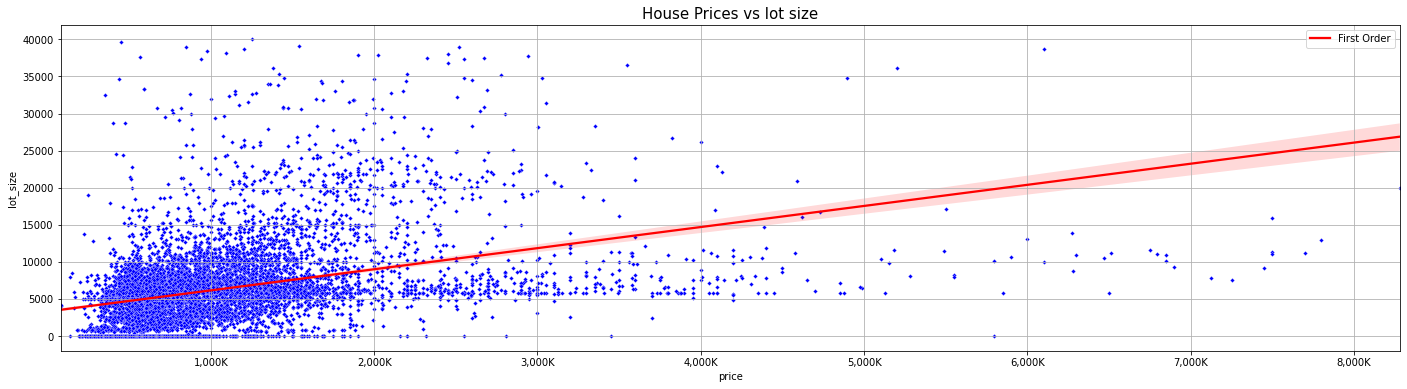

In [66]:
# Plot price against lot_size:
plt.figure(figsize=(24,6))
ax = sns.scatterplot(x='price',y='lot_size',data=df, s=10, color="b", marker="D")
# The function sns.regplot() uses the argument scatter=None to prevent plotting the scatter plot points again:
sns.regplot(x='price', y='lot_size', data=df, scatter=None, color='red', label='First Order')
# Plot in green a linear regression of order 2 between 'density' and 'fixed.acidity':
#sns.regplot(x='price', y='lot_size', data=df, scatter=None, order=2, color='green', label='Second Order')
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_title('House Prices vs lot size', fontsize=15)
ax.set_xticklabels(xlabels)
plt.legend(loc='upper right')
plt.grid(True)

Awesome, <code>**'lot_size'**</code> looks much better!!! and we can see thst there's a clear positive correlation between <code>**'price'**</code> and <code>**'lot_size'**</code>

now, let's look at <code>**'hoa_month'**</code> which is a **Numerical Variable**

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


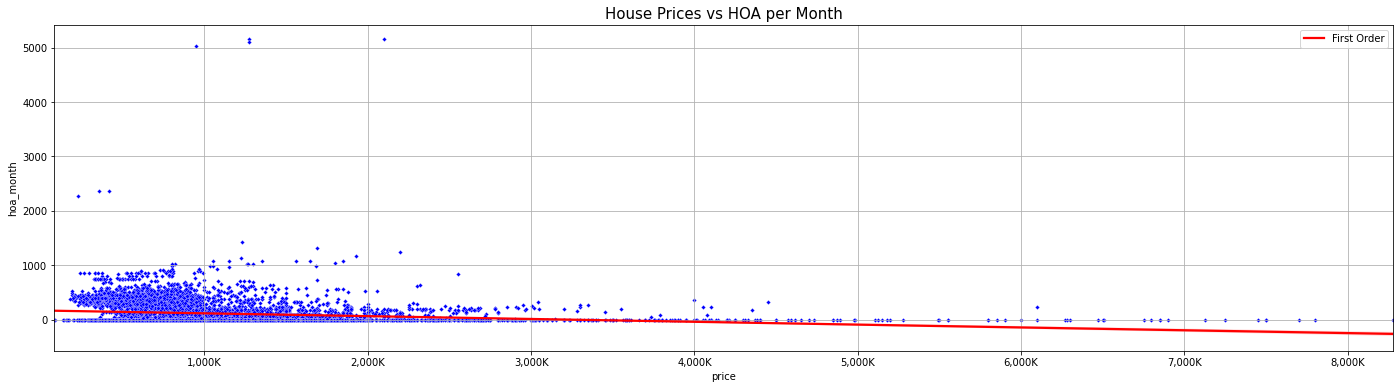

In [67]:
# Plot price against hoa_month:
plt.figure(figsize=(24,6))
ax = sns.scatterplot(x='price',y='hoa_month',data=df, s=10, color="b", marker="D")
# The function sns.regplot() uses the argument scatter=None to prevent plotting the scatter plot points again:
sns.regplot(x='price', y='hoa_month', data=df, scatter=None, color='red', label='First Order')
# Plot in green a linear regression of order 2 between 'density' and 'fixed.acidity':
#sns.regplot(x='price', y='hoa_month', data=df, scatter=None, order=2, color='green', label='Second Order')
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_title('House Prices vs HOA per Month', fontsize=15)
ax.set_xticklabels(xlabels)
plt.legend(loc='upper right')
plt.grid(True)

Somthing is weird here, so let's investigate to see if the data is valid where <code>**'hoa_month'**</code> > 1500!!!

In [68]:
#let's check house where ['hoa_month'] > 1500:
df[df['hoa_month'] > 1500]

address property_type  zipcode  \
2530            555 byron st #302, palo alto, ca 94301   Condo/Co-op    94301   
2586            555 byron st #109, palo alto, ca 94301   Condo/Co-op    94301   
2616            555 byron st #101, palo alto, ca 94301   Condo/Co-op    94301   
3219  1860 tice creek dr #1254, walnut creek, ca 94595   Condo/Co-op    94595   
3220  1860 tice creek dr #1141, walnut creek, ca 94595   Condo/Co-op    94595   
3423  1840 tice creek dr #2147, walnut creek, ca 94595   Condo/Co-op    94595   
8321            555 byron st #303, palo alto, ca 94301   Condo/Co-op    94301   

        price  beds  baths  sqft  lot_size  days_on_market  price_per_sqft  \
2530   950000     2      2  1454         0             175             653   
2586  1275000     2      3  2067     32715             126             617   
2616  1275000     3      2  1810         0             155             704   
3219   228000     1      1   601         0              94             379   
3220   355000     2      2   907         0             137             391   
3423   415000     2      2   907         0             157             458   
8321  2100000     3      3  2067     32715             263            1016   

      ...  property_age  school_rating  school_count  bart_count  \
2530  ...            24              8             3           0   
2586  ...            24              8             3           0   
2616  ...            24              8             3           0   
3219  ...            31              6             3           0   
3220  ...            31              6             3           0   
3423  ...            30              6             3           0   
8321  ...            24              8             3           0   

      median_income  hotness_score  supply_score  demand_score  malls_count  \
2530         142057          54.03         63.22         44.84            1   
2586         142057          54.03         63.22         44.84            1   
2616         142057          54.03         63.22         44.84            1   
3219          61767          68.20         81.36         55.05            1   
3220          61767          68.20         81.36         55.05            1   
3423          61767          68.20         81.36         55.05            1   
8321         142057          54.03         63.22         44.84            1   

      university_count  
2530                 2  
2586                 2  
2616                 2  
3219                 0  
3220                 0  
3423                 0  
8321                 2  

[7 rows x 23 columns]

In [69]:
df['hoa_month'].mean()

115.92387712642271

In [ ]:
#Now, let's impute df['hoa_month'].mean() in all houses where df[df['hoa_month'] > 1500]:
df.loc[df['hoa_month'] > 1500, 'hoa_month'] = df['hoa_month'].mean()

#let's comfirm the issue is fixed:
df[df['hoa_month'] > 1500]

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


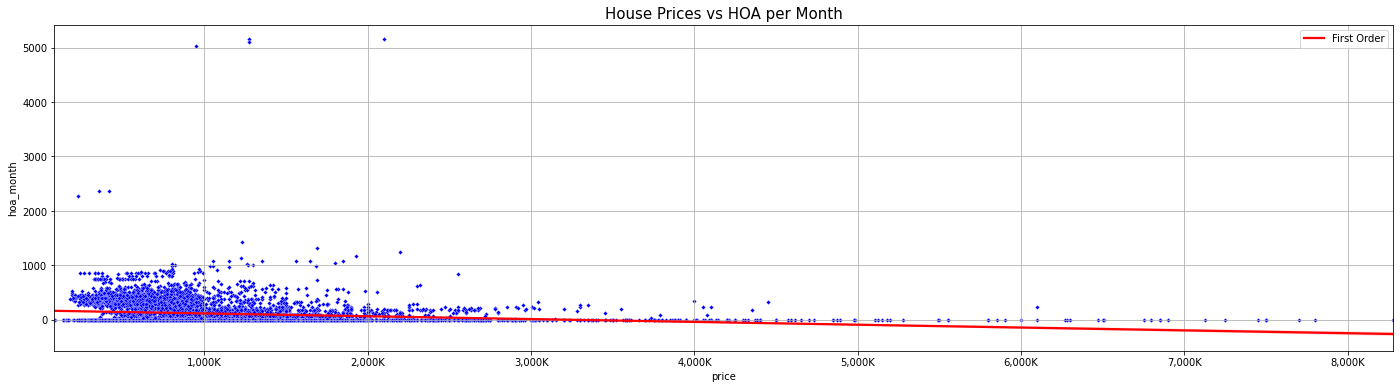

In [70]:
# Plot price against hoa_month:
plt.figure(figsize=(24,6))
ax = sns.scatterplot(x='price',y='hoa_month',data=df, s=10, color="b", marker="D")
# The function sns.regplot() uses the argument scatter=None to prevent plotting the scatter plot points again:
sns.regplot(x='price', y='hoa_month', data=df, scatter=None, color='red', label='First Order')
# Plot in green a linear regression of order 2 between 'density' and 'fixed.acidity':
#sns.regplot(x='price', y='hoa_month', data=df, scatter=None, order=2, color='green', label='Second Order')
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_title('House Prices vs HOA per Month', fontsize=15)
plt.legend(loc='upper right')
ax.set_xticklabels(xlabels)
plt.grid(True)

The data looks much better, and it's more clear that <code>**"price"**</code> and <code>**"hoa_month"**</code> have negative correlation which makes sense

Now let's look at <code>**"property_age"**</code> which is a **Numerical Variable**

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


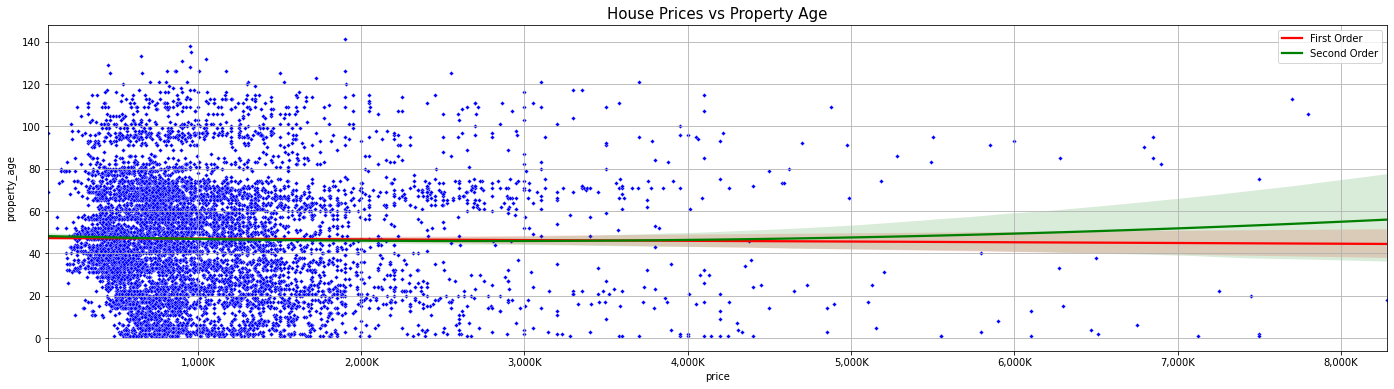

In [71]:
# Plot price against property_age:
plt.figure(figsize=(24,6))
ax = sns.scatterplot(x='price',y='property_age',data=df, s=10, color="b", marker="D")
# The function sns.regplot() uses the argument scatter=None to prevent plotting the scatter plot points again:
sns.regplot(x='price', y='property_age', data=df, scatter=None, color='red', label='First Order')
# Plot in green a linear regression of order 2 between 'density' and 'fixed.acidity':
sns.regplot(x='price', y='property_age', data=df, scatter=None, order=2, color='green', label='Second Order')
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_title('House Prices vs Property Age', fontsize=15)
plt.legend(loc='upper right')
ax.set_xticklabels(xlabels)
plt.grid(True)

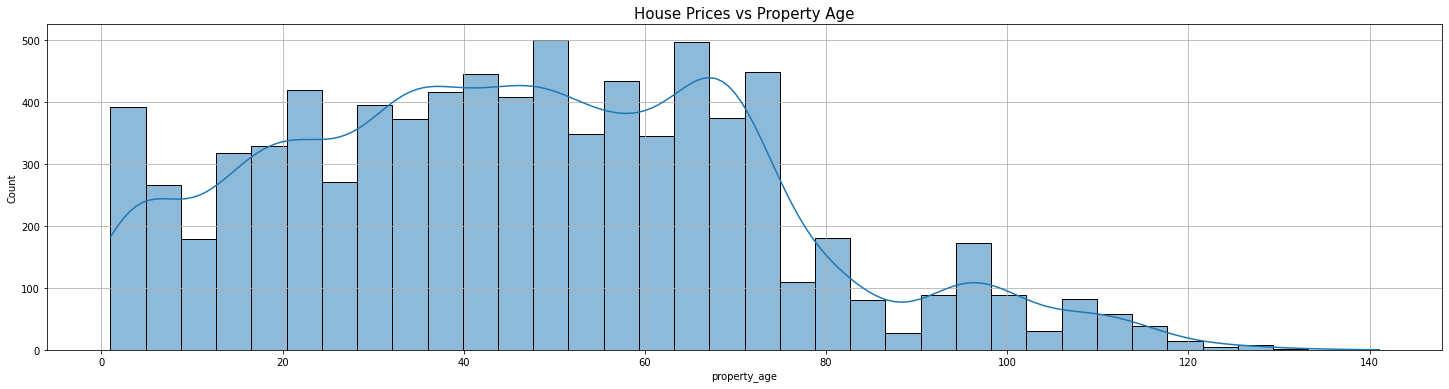

In [72]:
# Making a histogram of the 'property_age' variable:
f, ax = plt.subplots(figsize = (25,6))
ax = sns.histplot(x=df['property_age'], kde=True)
#ax.set(xlim = (0,1000000))
#ax.set(ylim = (0,20))
ax.set_title('House Prices vs Property Age', fontsize=15)
#xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
#ax.set_xticklabels(xlabels)
plt.grid(True)

As we can see there's no clear relationship between <code>**"price"**</code> and <code>**"property_age"**</code> because we see almost same count of houses across all code>**"property_age"**</code> groups.

Now let's check <code>**"school_rating"**</code> which is a **Categorical Variable**

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


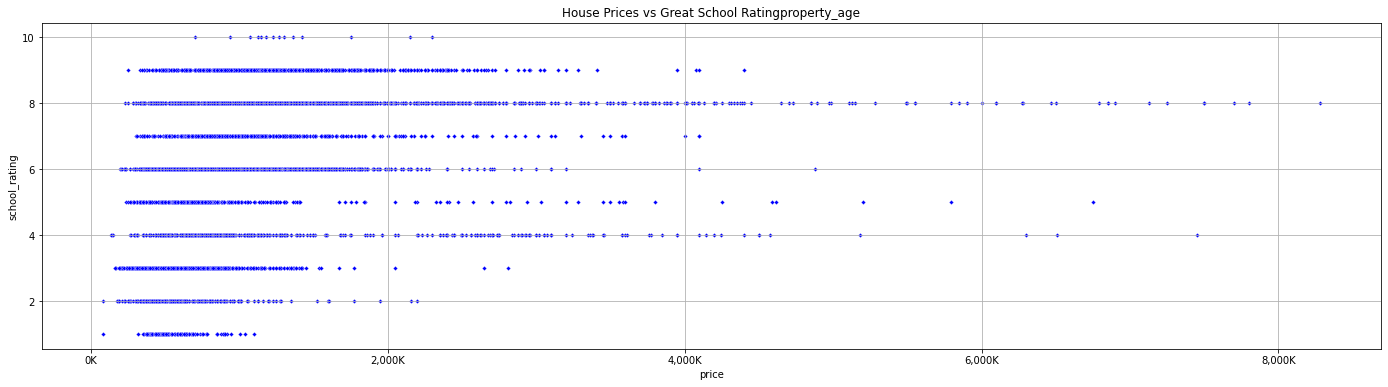

In [73]:
# Plot price against school_rating:
plt.figure(figsize=(24,6))
ax = sns.scatterplot(x='price',y='school_rating',data=df, s=10, color="b", marker="D")
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_title('House Prices vs Great School Rating''property_age')
ax.set_xticklabels(xlabels)
plt.grid(True)

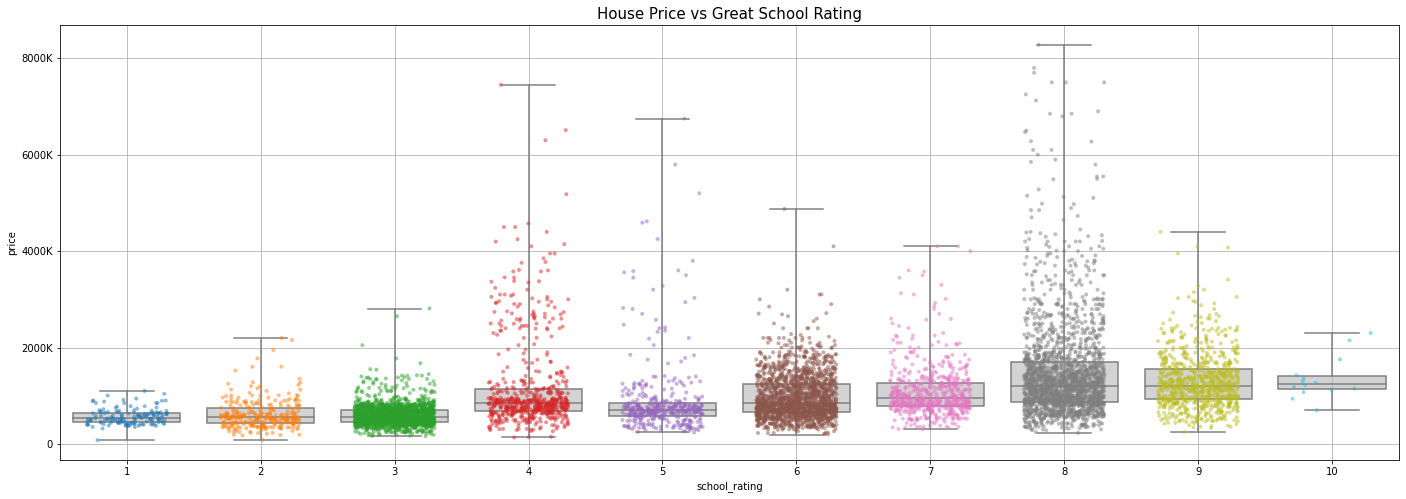

In [74]:
plt.figure(figsize=(24,8))
ax = sns.boxplot(x='school_rating', y='price', data=df, whis=np.inf, color="lightgrey")
#ax = sns.violinplot(x="school_rating", y="price", inner='quartile', data=df, color='lightgray')
#ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000]
plt.yticks([0, 2000000, 4000000, 6000000, 8000000], ['0', '2000K', '4000K', '6000K', '8000K'])
#plt.yscale('log')
sns.stripplot(x='school_rating', y='price', data=df, jitter=0.3, size=4, alpha=0.5)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('House Price vs Great School Rating', fontsize=15);
plt.grid(True)

let's add **log scale** Y-axis to improve visibility:

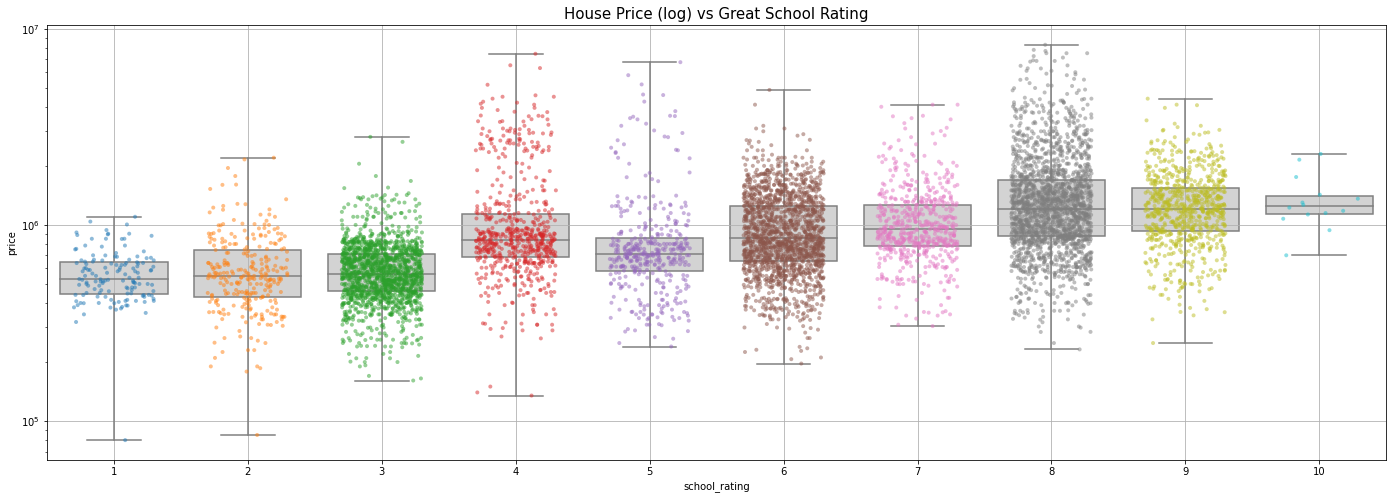

In [75]:
#let's add log scale to improve visibility:
plt.figure(figsize=(24,8))
ax = sns.boxplot(x='school_rating', y='price', data=df, whis=np.inf, color="lightgrey")
#ax = sns.violinplot(x="school_rating", y="price", inner='quartile', data=df, color='lightgray')
#ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000]
plt.yticks([0, 2000000, 4000000, 6000000, 8000000], ['0', '2000K', '4000K', '6000K', '8000K'])
#plt.yscale('log')
sns.stripplot(x='school_rating', y='price', data=df, jitter=0.3, size=4, alpha=0.5)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.yscale('log')
ax.set_title('House Price (log) vs Great School Rating', fontsize=15);
plt.grid(True)

We can see that there's a clear positive correlation between <code>**'price'**</code> and <code>**'school_rating'**</code>

Now let's check <code>**'school_count'**</code> which is a **Categorical Variable.**

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


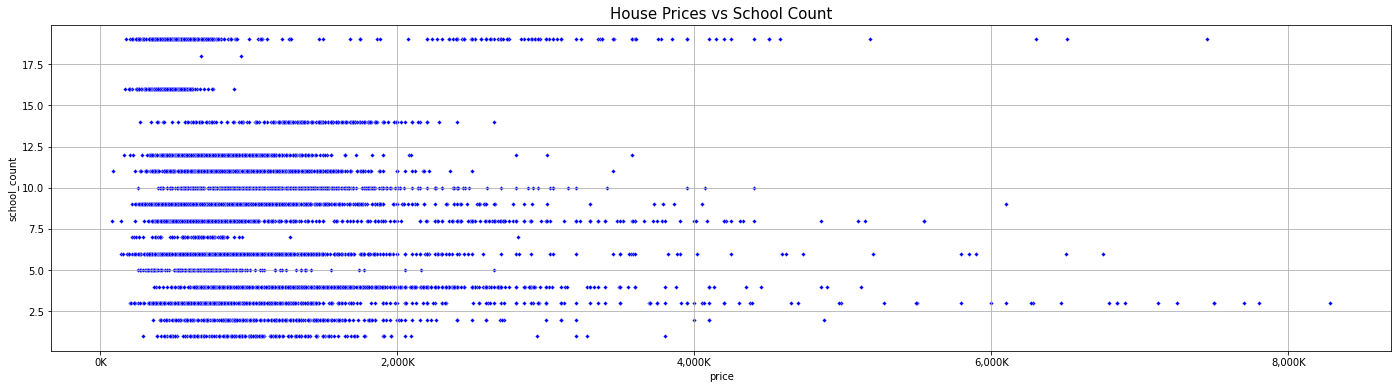

In [76]:
# Plot price against school_count:
plt.figure(figsize=(24,6))
ax = sns.scatterplot(x='price',y='school_count',data=df, s=10, color="b", marker="D")
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_title('House Prices vs School Count', fontsize=15)
ax.set_xticklabels(xlabels)
plt.grid(True)

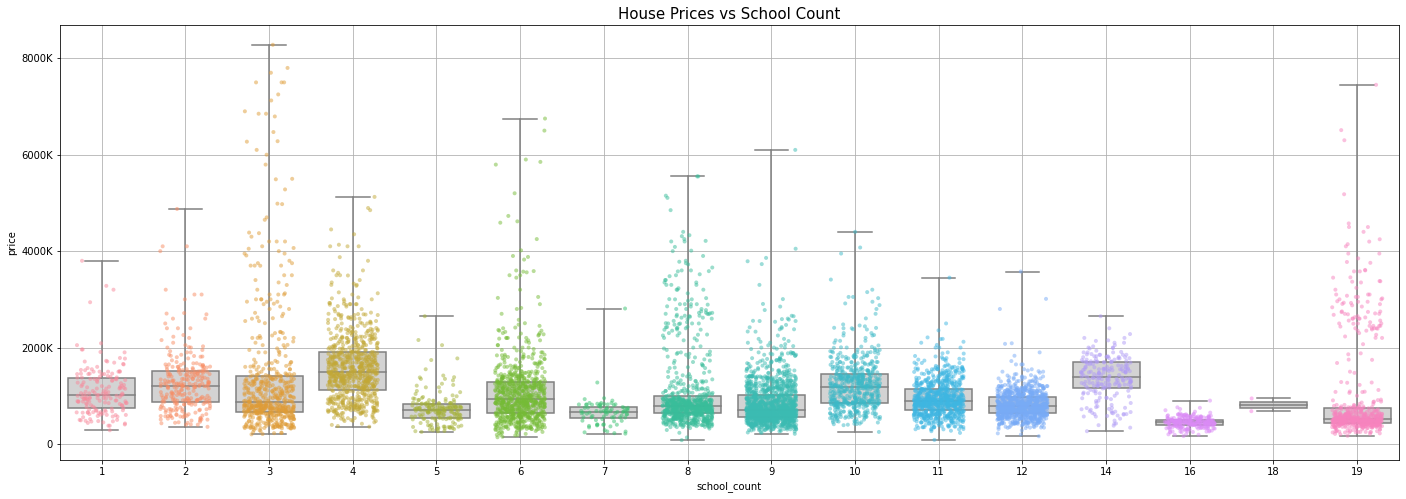

In [77]:
plt.figure(figsize=(24,8))
ax = sns.boxplot(x='school_count', y='price', data=df, whis=np.inf, color="lightgrey")
#ax = sns.violinplot(x="school_count", y="price", inner='quartile', data=df, color='lightgray')
#ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000]
plt.yticks([0, 2000000, 4000000, 6000000, 8000000], ['0', '2000K', '4000K', '6000K', '8000K'])
#plt.yscale('log')
sns.stripplot(x='school_count', y='price', data=df, jitter=0.3, size=4, alpha=0.5)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('House Prices vs School Count', fontsize=15);
plt.grid(True)

let's add **log scale** to y-axis to improve visibility

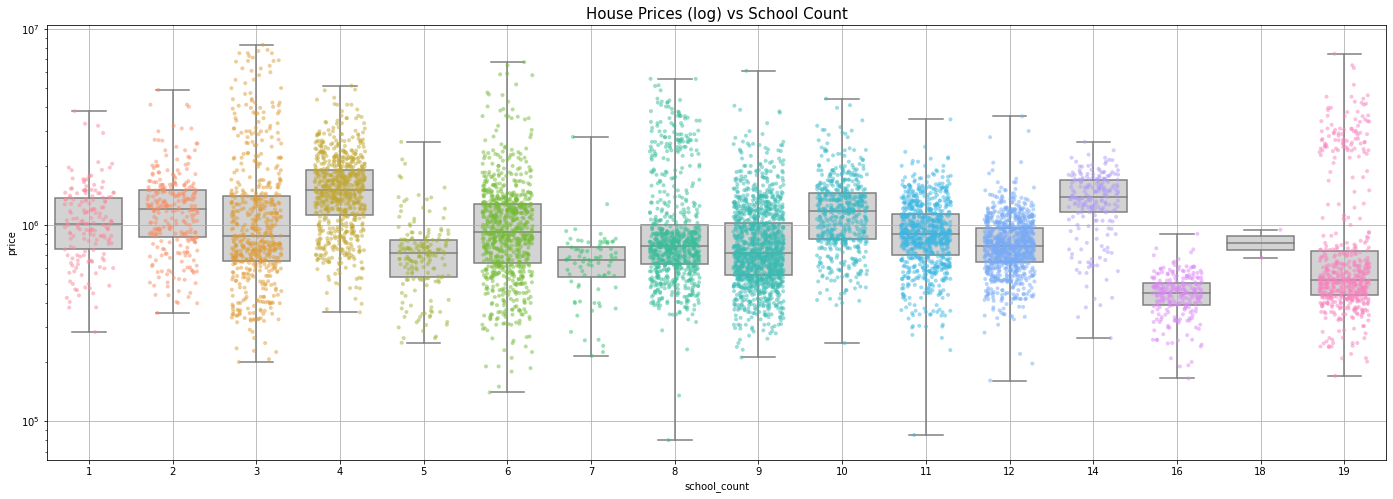

In [78]:
plt.figure(figsize=(24,8))
ax = sns.boxplot(x='school_count', y='price', data=df, whis=np.inf, color="lightgrey")
#ax = sns.violinplot(x="school_count", y="price", inner='quartile', data=df, color='lightgray')
#ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000]
plt.yticks([0, 2000000, 4000000, 6000000, 8000000], ['0', '2000K', '4000K', '6000K', '8000K'])
#plt.yscale('log')
sns.stripplot(x='school_count', y='price', data=df, jitter=0.3, size=4, alpha=0.5)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.yscale('log')
ax.set_title('House Prices (log) vs School Count', fontsize=15);
plt.grid(True)

We can see that there's No clear correlation between <code>**'price'**</code> and <code>**'school_count'**</code>

Now let's check <code>**'median_income'**</code> which is a **Categorical Variable.**

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


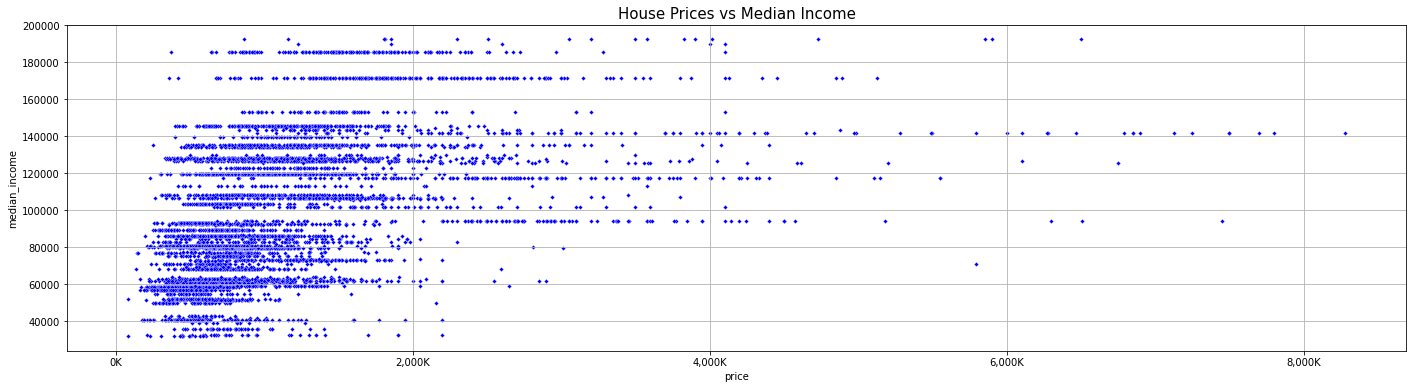

In [79]:
# Plot price against median_income:
plt.figure(figsize=(24,6))
ax = sns.scatterplot(x='price',y='median_income',data=df, s=10, color="b", marker="D")
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_title('House Prices vs Median Income', fontsize=15)
ax.set_xticklabels(xlabels)
plt.grid(True)

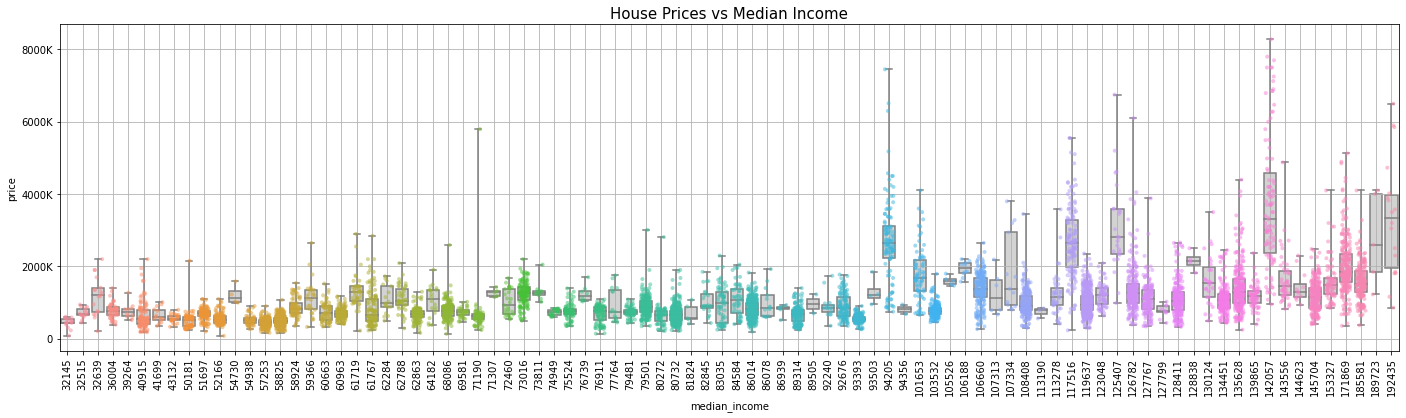

In [81]:

plt.figure(figsize=(24,6))
ax = sns.boxplot(x='median_income', y='price', data=df, whis=np.inf, color="lightgrey")
#ax = sns.violinplot(x="median_income", y="price", inner='quartile', data=df, color='lightgray')
#ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000]
plt.yticks([0, 2000000, 4000000, 6000000, 8000000], ['0', '2000K', '4000K', '6000K', '8000K'])
#plt.yscale('log')
sns.stripplot(x='median_income', y='price', data=df, jitter=0.3, size=4, alpha=0.5)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('House Prices vs Median Income', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.grid(True)


let's add **log scale** to y-axis to improve visibility

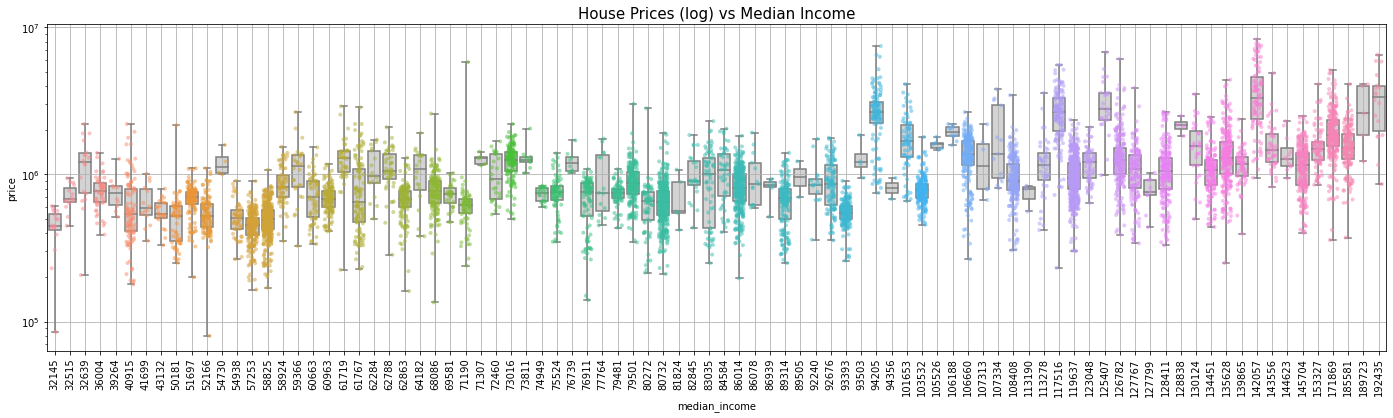

In [82]:
plt.figure(figsize=(24,6))
ax = sns.boxplot(x='median_income', y='price', data=df, whis=np.inf, color="lightgrey")
#ax = sns.violinplot(x="median_income", y="price", inner='quartile', data=df, color='lightgray')
#ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000]
plt.yticks([0, 2000000, 4000000, 6000000, 8000000], ['0', '2000K', '4000K', '6000K', '8000K'])
#plt.yscale('log')
sns.stripplot(x='median_income', y='price', data=df, jitter=0.3, size=4, alpha=0.5)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('House Prices (log) vs Median Income', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.yscale('log')
plt.grid(True)

We can see that there's a clear positive correlation between <code>**'price'**</code> and <code>**'median_income'**</code>

Now let's check <code>**'malls_count'**</code> which is a **Categorical Variable.**

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


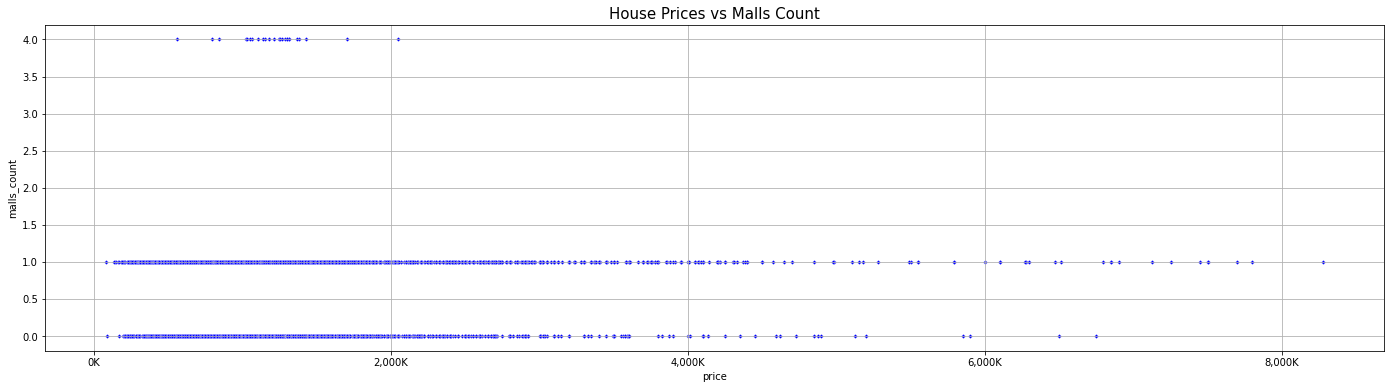

In [83]:
# Plot price against malls_count:
plt.figure(figsize=(24,6))
ax = sns.scatterplot(x='price',y='malls_count',data=df, s=10, color="b", marker="D")
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_title('House Prices vs Malls Count', fontsize=15)
ax.set_xticklabels(xlabels)
plt.grid(True)

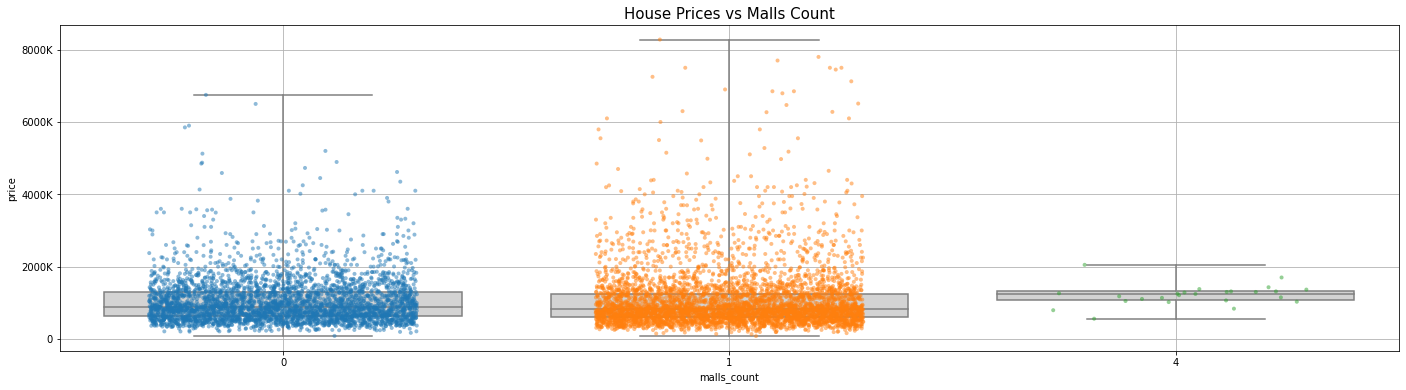

In [84]:
plt.figure(figsize=(24,6))
ax = sns.boxplot(x='malls_count', y='price', data=df, whis=np.inf, color="lightgrey")
#ax = sns.violinplot(x="malls_count", y="price", inner='quartile', data=df, color='lightgray')
#ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000]
plt.yticks([0, 2000000, 4000000, 6000000, 8000000], ['0', '2000K', '4000K', '6000K', '8000K'])
#plt.yscale('log')
sns.stripplot(x='malls_count', y='price', data=df, jitter=0.3, size=4, alpha=0.5)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('House Prices vs Malls Count', fontsize=15)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.grid(True)

let's add **log scale** to y-axis to improve visibility

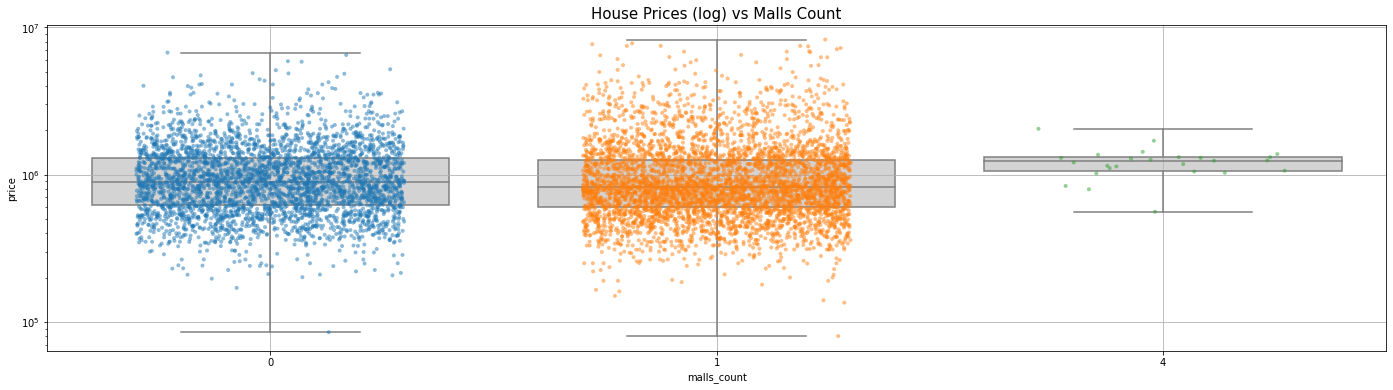

In [89]:
plt.figure(figsize=(24,6))
ax = sns.boxplot(x='malls_count', y='price', data=df, whis=np.inf, color="lightgrey")
#ax = sns.violinplot(x="malls_count", y="price", inner='quartile', data=df, color='lightgray')
#ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000]
plt.yticks([0, 2000000, 4000000, 6000000, 8000000], ['0', '2000K', '4000K', '6000K', '8000K'])
#plt.yscale('log')
sns.stripplot(x='malls_count', y='price', data=df, jitter=0.3, size=4, alpha=0.5)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('House Prices (log) vs Malls Count', fontsize=15)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.yscale('log')
plt.grid(True)

We can see that there's a kind of positive correlation between <code>**'price'**</code> and <code>**'malls_count'**</code>

Houses a little bit higher in price when we have malls compared when we don't have which makes sense!!!

Now let's check <code>**'university_count'**</code> which is a **Categorical Variable.**

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


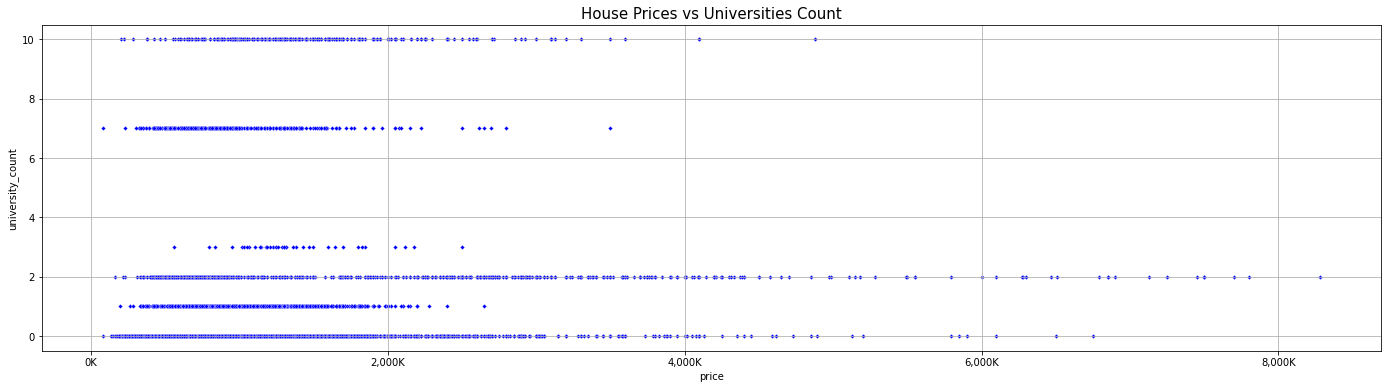

In [85]:
# Plot price against university_count:
plt.figure(figsize=(24,6))
ax = sns.scatterplot(x='price',y='university_count',data=df, s=10, color="b", marker="D")
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_title('House Prices vs Universities Count', fontsize=15)
ax.set_xticklabels(xlabels)
plt.grid(True)

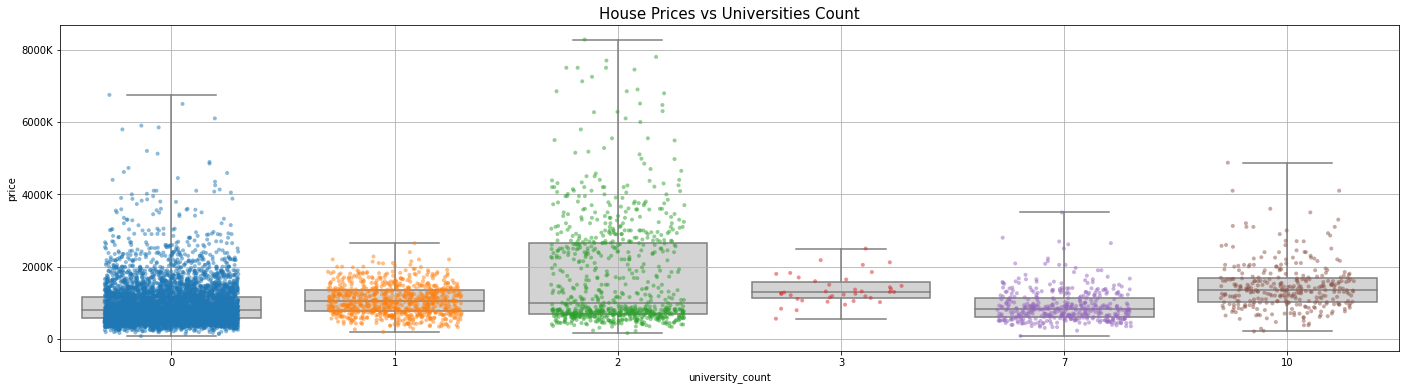

In [86]:
plt.figure(figsize=(24,6))
ax = sns.boxplot(x='university_count', y='price', data=df, whis=np.inf, color="lightgrey")
#ax = sns.violinplot(x="university_count", y="price", inner='quartile', data=df, color='lightgray')
#ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000]
plt.yticks([0, 2000000, 4000000, 6000000, 8000000], ['0', '2000K', '4000K', '6000K', '8000K'])
#plt.yscale('log')
sns.stripplot(x='university_count', y='price', data=df, jitter=0.3, size=4, alpha=0.5)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('House Prices vs Universities Count', fontsize=15)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.grid(True)

let's add **log scale** to y-axis to improve visibility

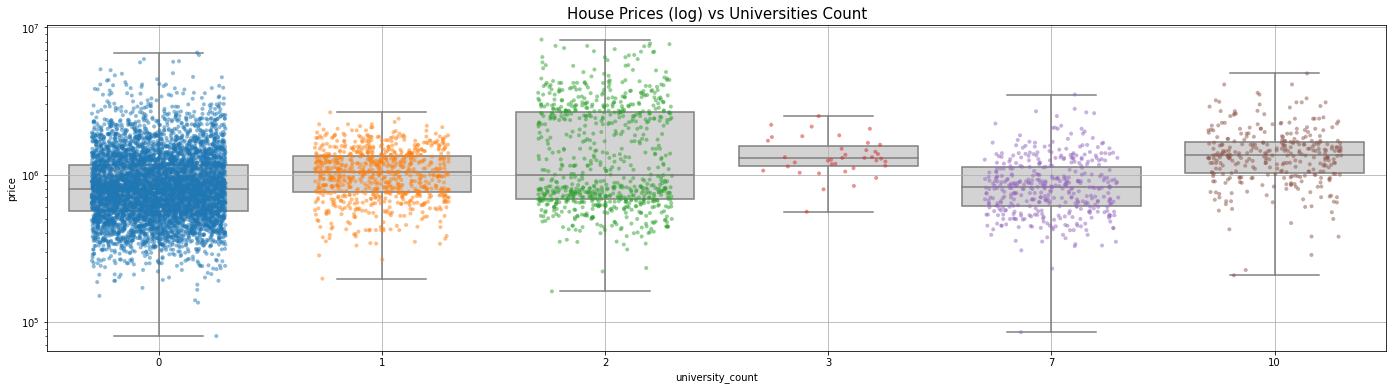

In [88]:
plt.figure(figsize=(24,6))
ax = sns.boxplot(x='university_count', y='price', data=df, whis=np.inf, color="lightgrey")
#ax = sns.violinplot(x="university_count", y="price", inner='quartile', data=df, color='lightgray')
#ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000]
plt.yticks([0, 2000000, 4000000, 6000000, 8000000], ['0', '2000K', '4000K', '6000K', '8000K'])
#plt.yscale('log')
sns.stripplot(x='university_count', y='price', data=df, jitter=0.3, size=4, alpha=0.5)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('House Prices (log) vs Universities Count', fontsize=15)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.yscale('log')
plt.grid(True)

We can see that there's a positive correlation between <code>**'price'**</code> and <code>**'university_count'**</code> howevere, looks like the majority of the sold houses have no universities close by


### 2.4.5 Choosing a dependent variable<a id='2.4.5_Choosing_a_dependent_variable'></a>
Due to the nature of this project, **price** will be our dependent variable

Let's check it out ....

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


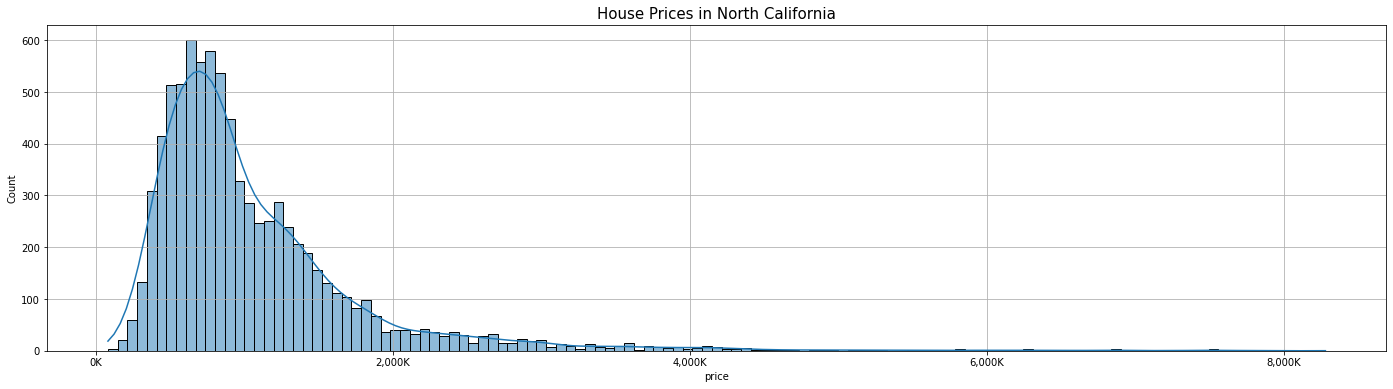

In [90]:
# Making a histogram of the price variable.
f, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x=df['price'], kde=True)
#ax.set(xlim = (5000000,40000000))
#ax.set(ylim = (0,20))
ax.set_title('House Prices in North California', fontsize=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
plt.grid(True)

In [91]:
# Get a basic statistical summary of the variables 
pd.set_option('float_format', '{:.2f}'.format)
df['price'].T.describe()

count      8171.00
mean    1059341.01
std      748141.95
min       80000.00
25%      610000.00
50%      847000.00
75%     1275000.00
max     8280000.00
Name: price, dtype: float64

| Stats |  Summary|
|:--- |:--- |
|Avg Houses Price |1,059,341 USD|
|Std|748,141.95 |
|Min House Price |80,000 USD|
|Q1 |610,000 USD|
|Median House Price |847,000 USD|
|Q3 |1,275,000 USD |
|Max House Price|8,280,000 USD |
|House Count |8171 |


### 2.4.6 Features Engineering<a id='2.4.6_Features_Engineering'></a>

#### 2.4.6.1 PairPlot<a id='2.4.6.1_PairPlot'></a>

let's use pairplot from seaborn to plot our dependant variable **'price'** against the main features:
**'beds'**, **'property_type'**, **'baths'**, **'sqft'**, **'school_rating'**, **'school_count'**, **'bart_count', **''median_income'**, **''lot_size'**, **''hoa_month'**, **'malls_count'**, **'university_count'** per **'property_type'**

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


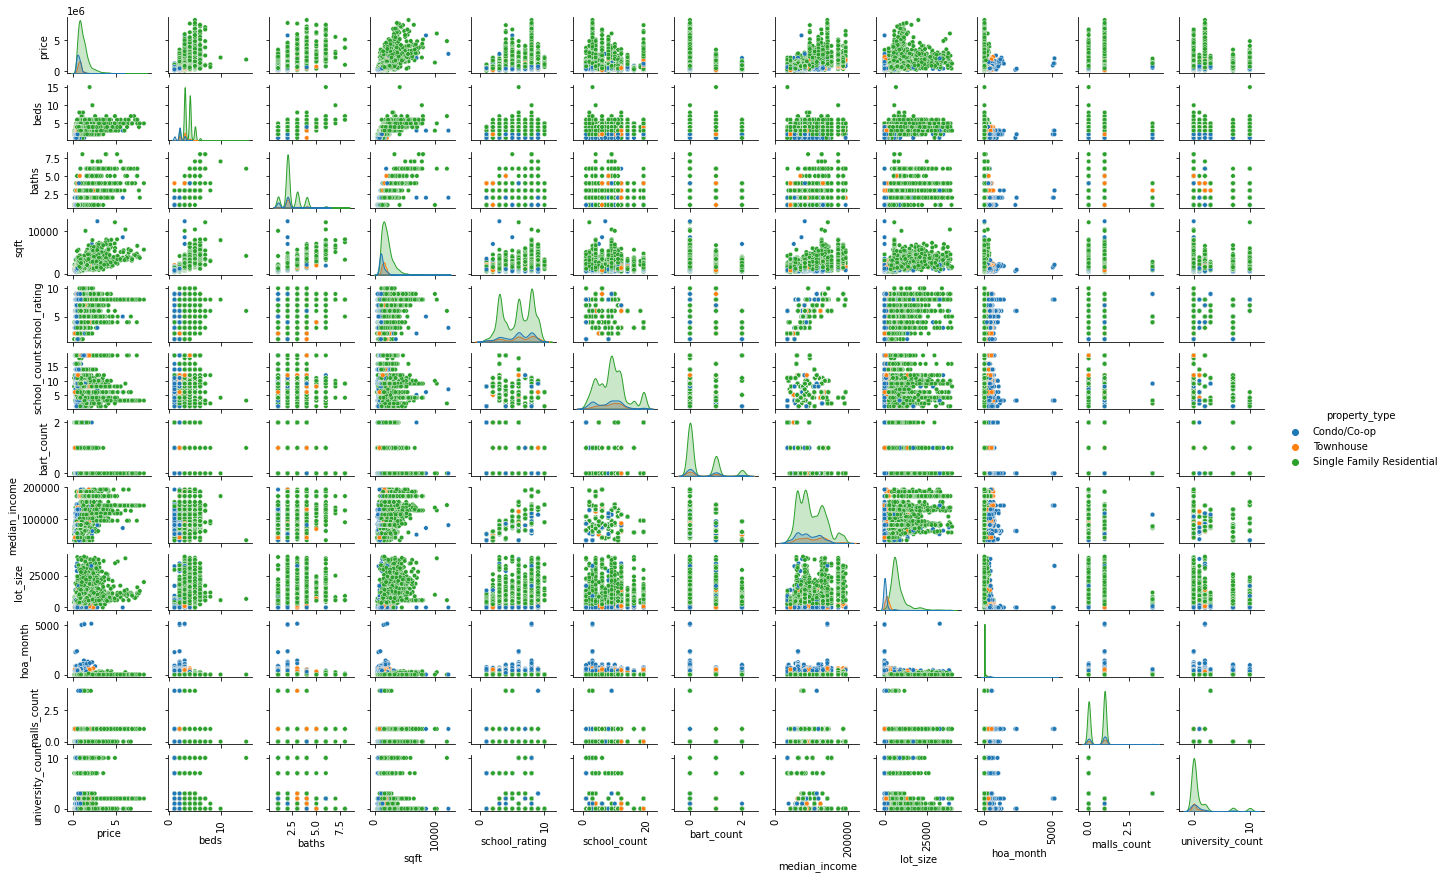

In [93]:
# Make a pairplot of the df data
# Due to the large features in the house df, let's add "aspect", "height" & "hspace" to control the size and spacing of the plots.
# let's improve the visibility by adding "palette" and a dictionary of keyword (plot_kws) to control the size:
g = sns.pairplot(df[['price', 'beds', 'baths', 'sqft', 'property_type', 'school_rating', 'school_count', 'bart_count',
       'median_income', 'lot_size', 'hoa_month', 'malls_count', 'university_count']], hue='property_type', height=1, aspect=1.5, palette="tab10", plot_kws = {"s":20})
plt.subplots_adjust(hspace=0.2)
g.fig.draw(g.fig.canvas.get_renderer())  # required, as matplotlib calculates ticks during draw time
for ax in g.axes.flat: 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


#### 2.4.6.2 Heatmap<a id='2.4.6.2_Heatmap'></a>

let's use heatmap from seaborn to Check the correlation between our dependant variable **'price'** against the main features:
**'beds'**, **'property_type'**, **'baths'**, **'sqft'**, **'school_rating'**, **'school_count'**, **'bart_count', **''median_income'**, **''lot_size'**, **''hoa_month'**, **'malls_count'**, **'university_count'** per **'property_type'**

In [94]:
# Call the .corr() method on the df dataset:
df.corr()

zipcode  price  beds  baths  sqft  lot_size  days_on_market  \
zipcode              1.00  -0.23 -0.13  -0.12 -0.15     -0.15            0.01   
price               -0.23   1.00  0.45   0.52  0.61      0.38           -0.05   
beds                -0.13   0.45  1.00   0.65  0.73      0.44           -0.02   
baths               -0.12   0.52  0.65   1.00  0.77      0.30           -0.01   
sqft                -0.15   0.61  0.73   0.77  1.00      0.47           -0.02   
lot_size            -0.15   0.38  0.44   0.30  0.47      1.00           -0.01   
days_on_market       0.01  -0.05 -0.02  -0.01 -0.02     -0.01            1.00   
price_per_sqft      -0.11   0.65 -0.09  -0.05 -0.10      0.07           -0.05   
hoa_month            0.03  -0.18 -0.37  -0.09 -0.18     -0.37            0.03   
lat                 -0.15  -0.44 -0.01  -0.11 -0.02      0.06            0.02   
long                -0.13  -0.09  0.22   0.18  0.18      0.08            0.02   
property_age         0.07  -0.01 -0.18  -0.39 -0.31      0.10           -0.02   
school_rating       -0.14   0.38  0.20   0.28  0.31      0.19           -0.01   
school_count        -0.08  -0.20  0.04  -0.06 -0.09     -0.07            0.01   
bart_count          -0.04  -0.28 -0.08  -0.12 -0.15     -0.14            0.01   
median_income       -0.19   0.48  0.30   0.39  0.45      0.30           -0.00   
hotness_score       -0.24  -0.40  0.12   0.01  0.05      0.10            0.00   
supply_score         0.08  -0.35 -0.03  -0.09 -0.15     -0.16            0.01   
demand_score        -0.30  -0.35  0.14   0.04  0.11      0.17           -0.00   
malls_count         -0.14   0.02  0.03   0.03  0.02     -0.00            0.01   
university_count     0.14   0.14 -0.13  -0.08 -0.07     -0.10            0.01   

                  price_per_sqft  hoa_month   lat  ...  property_age  \
zipcode                    -0.11       0.03 -0.15  ...          0.07   
price                       0.65      -0.18 -0.44  ...         -0.01   
beds                       -0.09      -0.37 -0.01  ...         -0.18   
baths                      -0.05      -0.09 -0.11  ...         -0.39   
sqft                       -0.10      -0.18 -0.02  ...         -0.31   
lot_size                    0.07      -0.37  0.06  ...          0.10   
days_on_market             -0.05       0.03  0.02  ...         -0.02   
price_per_sqft              1.00      -0.09 -0.60  ...          0.28   
hoa_month                  -0.09       1.00 -0.06  ...         -0.28   
lat                        -0.60      -0.06  1.00  ...          0.02   
long                       -0.27      -0.03 -0.08  ...         -0.43   
property_age                0.28      -0.28  0.02  ...          1.00   
school_rating               0.24       0.09 -0.26  ...         -0.18   
school_count               -0.17      -0.11  0.08  ...         -0.15   
bart_count                 -0.25      -0.02  0.22  ...         -0.02   
median_income               0.23       0.00 -0.26  ...         -0.24   
hotness_score              -0.60      -0.12  0.56  ...         -0.17   
supply_score               -0.28      -0.04  0.16  ...         -0.13   
demand_score               -0.60      -0.13  0.58  ...         -0.16   
malls_count                -0.01       0.05 -0.10  ...         -0.10   
university_count            0.28      -0.03 -0.06  ...          0.37   

                  school_rating  school_count  bart_count  median_income  \
zipcode                   -0.14         -0.08       -0.04          -0.19   
price                      0.38         -0.20       -0.28           0.48   
beds                       0.20          0.04       -0.08           0.30   
baths                      0.28         -0.06       -0.12           0.39   
sqft                       0.31         -0.09       -0.15           0.45   
lot_size                   0.19         -0.07       -0.14           0.30   
days_on_market            -0.01          0.01        0.01          -0.00   
price_per_sqft             0.24         -0

### 2.4.7 price against all features when changing House prices Range<a id='2.4.7_price_against_all_features_when_changing_House_prices_Range'></a>

  * House Prices between 80K USD - 8M USD
  * House Prices between 80K USD - 4M USD 
  * House Prices between 300K USD - 4M USD   
  * House Prices between 300K USD - 2M USD  

#### 2.4.7.1 House prices between 80K USD - 8M USD<a id='2.4.7.1_House_Prices_between_80K_USD_8M_USD'></a>

Text(0.5, 1.0, 'House Prices 80K - 8M USD')

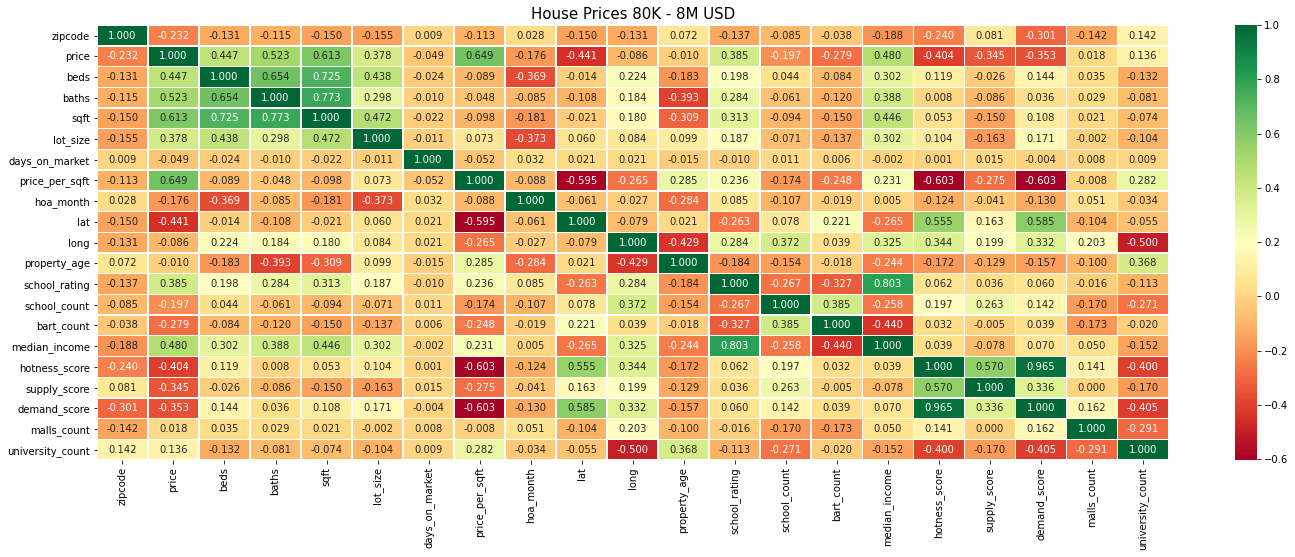

In [95]:
# Make a heatmap of the data 
plt.figure(figsize=(24,8)) # ensure that the Matplotlib plot is big enough
sns.heatmap(df.corr(), linewidths=.4, annot=True, fmt=".3f", cmap='RdYlGn')
plt.title('House Prices 80K - 8M USD', fontsize=15)

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


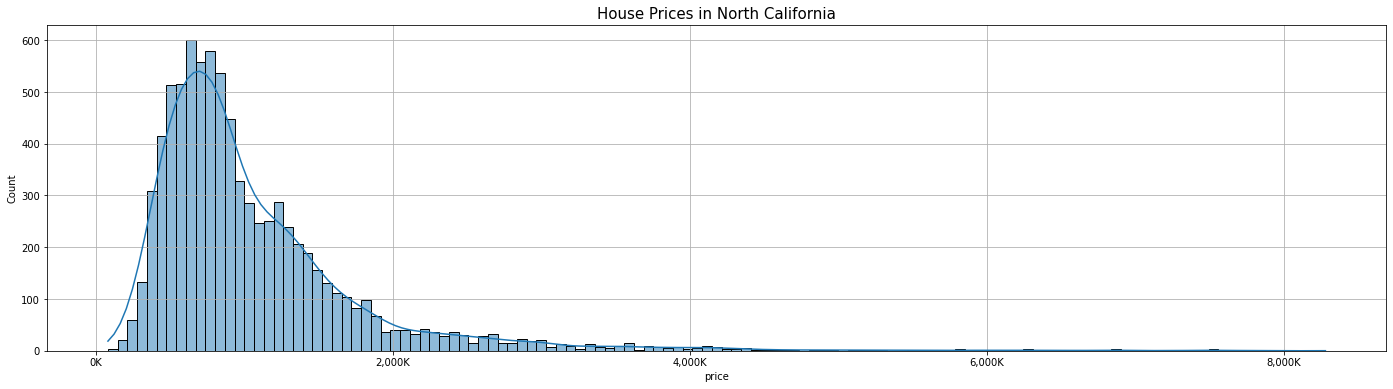

In [96]:
# Making a histogram of the price variable.
f, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x=df['price'], kde=True)
#ax.set(xlim = (5000000,40000000))
#ax.set(ylim = (0,20))
ax.set_title('House Prices in North California', fontsize=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
plt.grid(True)

In [97]:
df.shape

(8171, 23)

#### 2.4.7.2 House prices between 80K USD - 4M USD<a id='2.4.7.2_House_Prices_between_80K_USD_4M_USD'></a>

In [98]:
price_1 = df[df['price'] < 4000000] 

Text(0.5, 1.0, 'House Prices 80K - 4M USD')

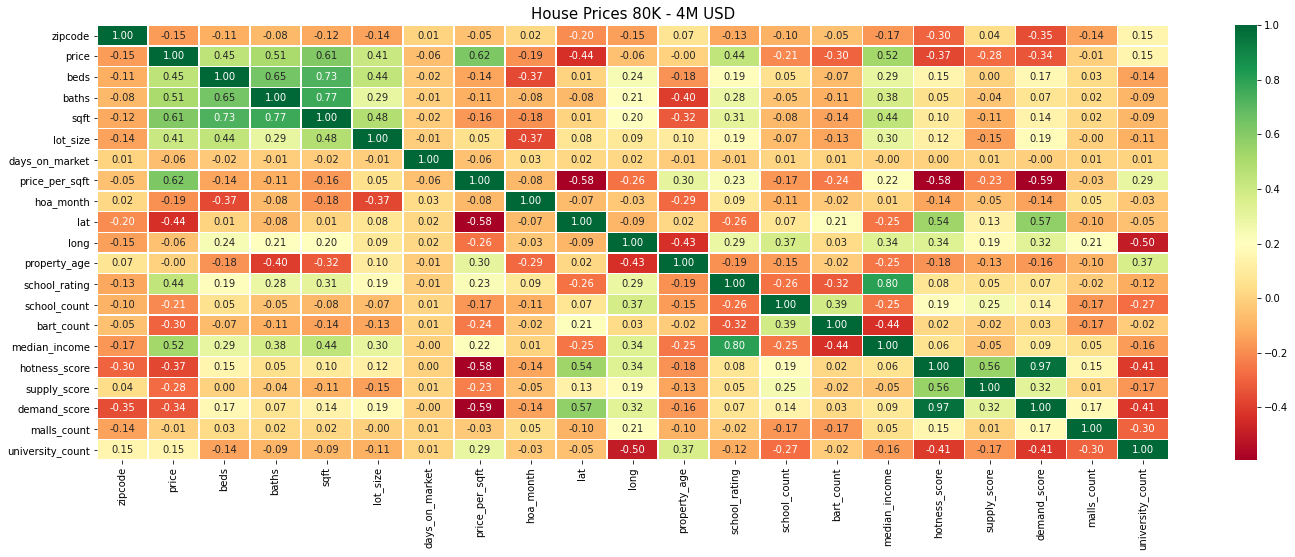

In [99]:
# Make a heatmap of the data 
plt.figure(figsize=(24,8)) # ensure that the Matplotlib plot is big enough
sns.heatmap(price_1.corr(), linewidths=.4, annot=True, fmt=".2f", cmap='RdYlGn')
plt.title('House Prices 80K - 4M USD', fontsize=15)

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


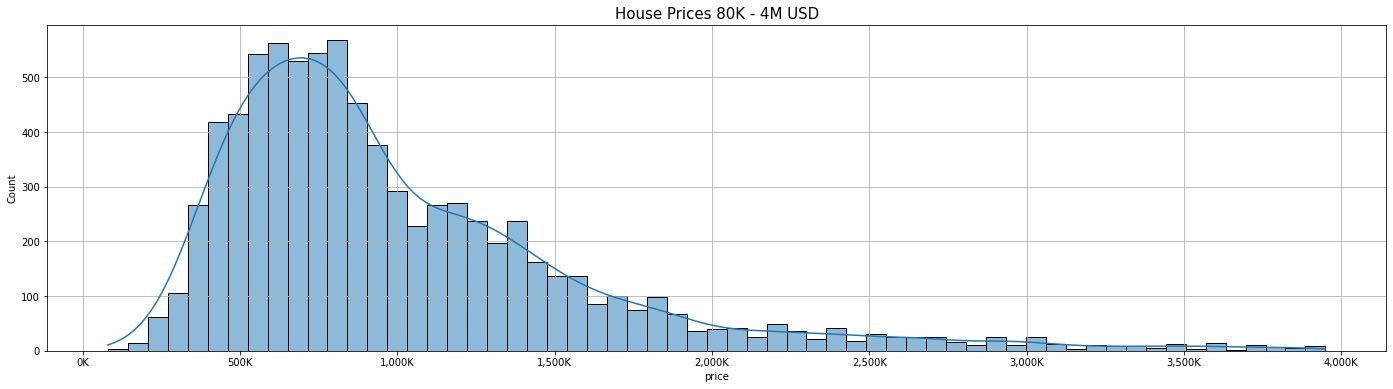

In [100]:
# Making a histogram of the price variable.
f, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x=price_1['price'], kde=True)
#ax.set(xlim = (5000000,40000000))
#ax.set(ylim = (0,20))
ax.set_title('House Prices 80K - 4M USD', fontsize=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
plt.grid(True)

In [101]:
price_1.shape

(8081, 23)

#### 2.4.7.3 House prices between 300K USD - 4M USD<a id='2.4.7.3_House_Prices_between_300K_USD_4M_USD'></a>

In [102]:
price_2 = price_1[price_1['price'] > 300000] 

Text(0.5, 1.0, 'House Prices 300K - 4M USD')

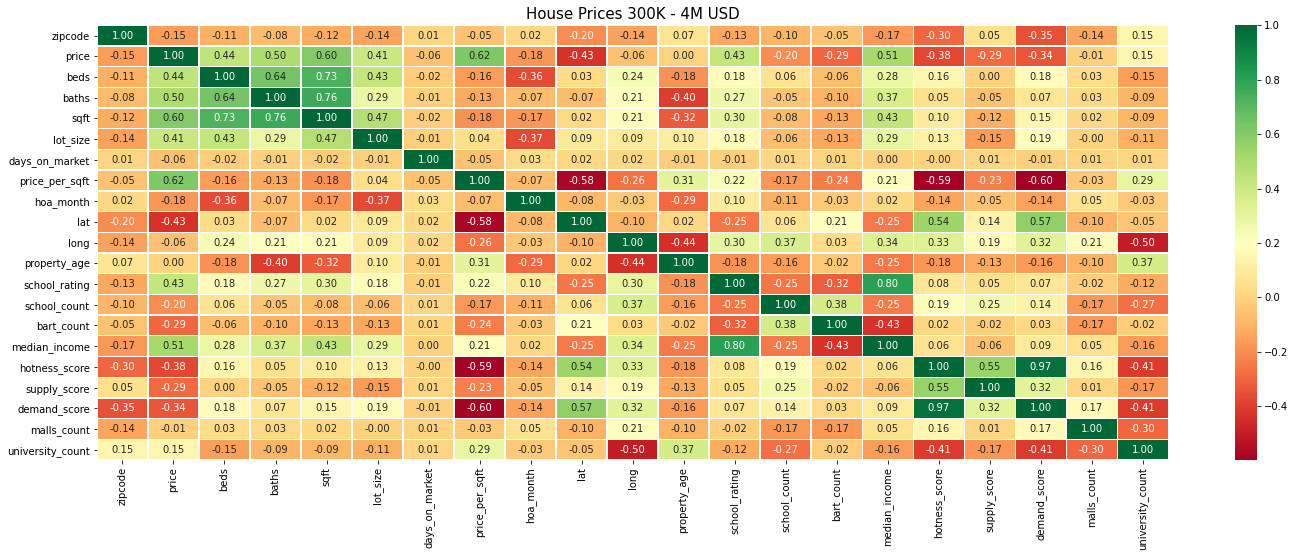

In [103]:
# Make a heatmap of the data 
plt.figure(figsize=(24,8)) # ensure that the Matplotlib plot is big enough
sns.heatmap(price_2.corr(), linewidths=.4, annot=True, fmt=".2f", cmap='RdYlGn')
plt.title('House Prices 300K - 4M USD', fontsize=15)

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


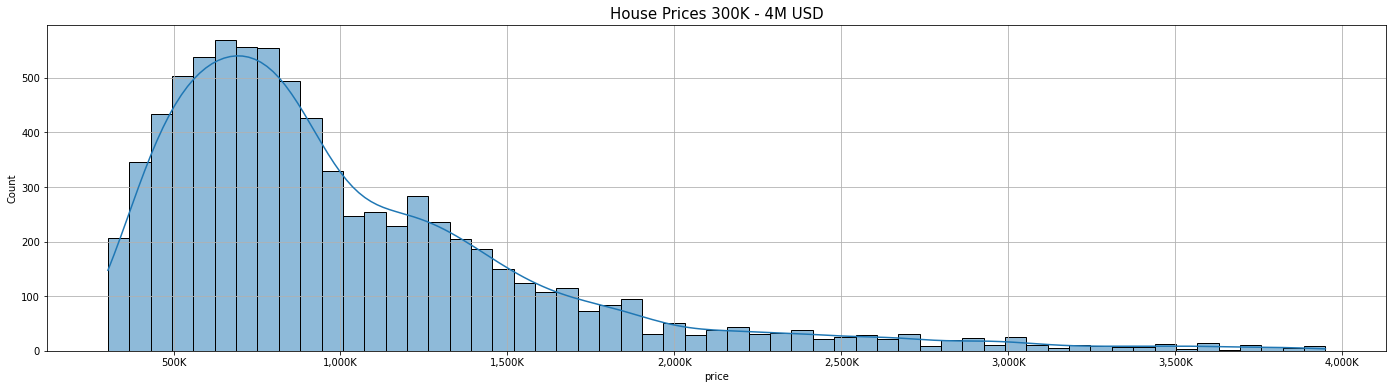

In [104]:
# Making a histogram of the price variable.
f, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x=price_2['price'], kde=True)
#ax.set(xlim = (5000000,40000000))
#ax.set(ylim = (0,20))
ax.set_title('House Prices 300K - 4M USD', fontsize=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
plt.grid(True)

In [105]:
price_2.shape

(7964, 23)

#### 2.4.7.4 House prices between 300K USD - 2M USD<a id='2.4.7.4_House_Prices_between_300K_USD_2M_USD'></a>

In [106]:
price_3 = price_2[price_2['price'] < 2000000] 

Text(0.5, 1.0, 'House Prices 300K-2M USD')

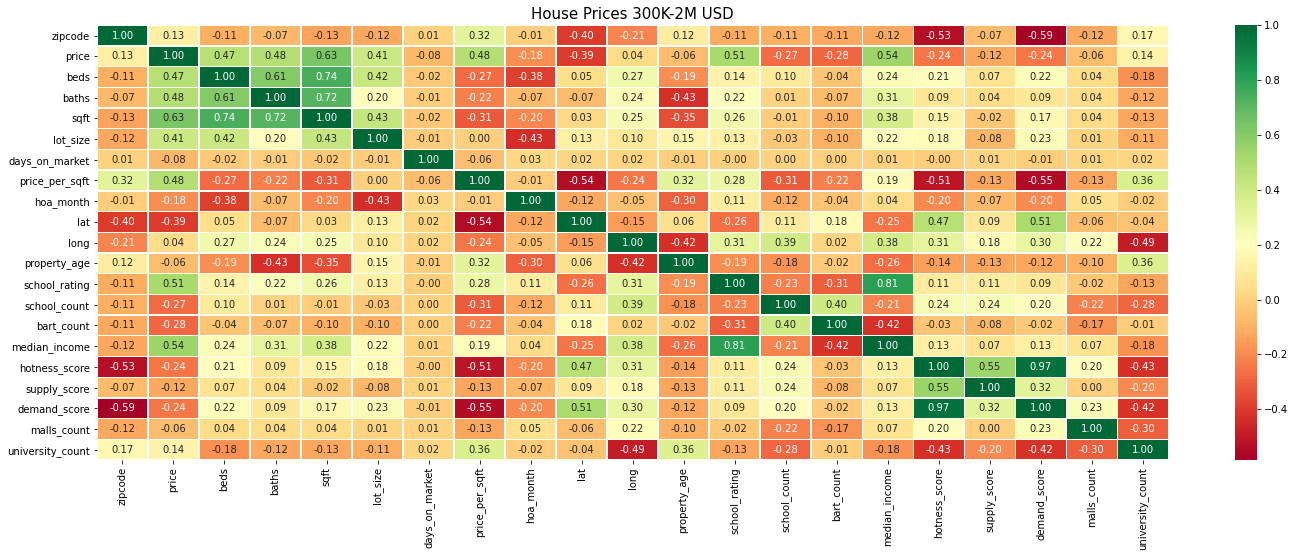

In [107]:
# Make a heatmap of the data 
plt.figure(figsize=(24,8)) # ensure that the Matplotlib plot is big enough
sns.heatmap(price_3.corr(), linewidths=.4, annot=True, fmt=".2f", cmap='RdYlGn')
plt.title('House Prices 300K-2M USD', fontsize=15)

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


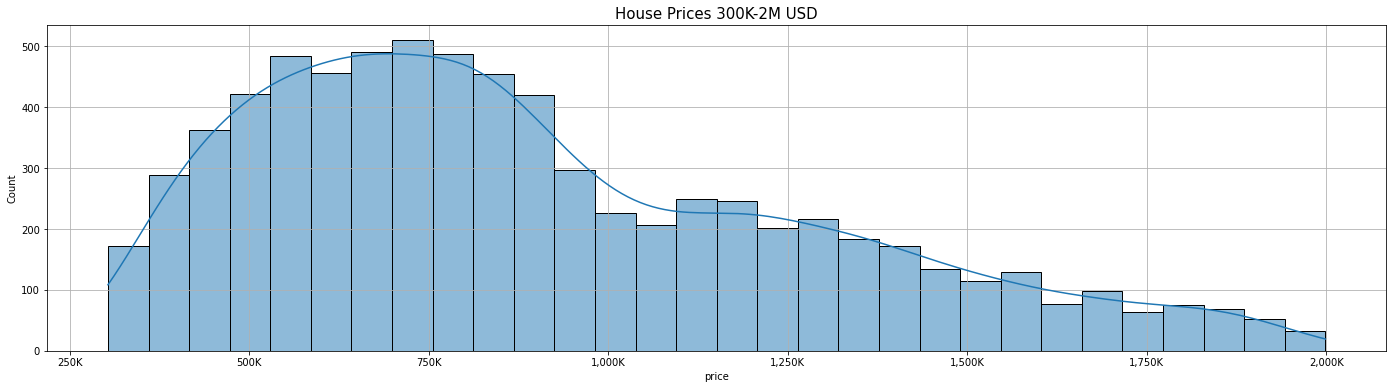

In [108]:
# Making a histogram of the price variable.
f, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x=price_3['price'], kde=True)
#ax.set(xlim = (5000000,40000000))
#ax.set(ylim = (0,20))
ax.set_title('House Prices 300K-2M USD', fontsize=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
plt.grid(True)

In [109]:
price_3.shape

(7396, 23)

#### 2.4.7.5 Compare Correlations<a id='2.4.7.5_Compare_Correlations'></a>

Now let's compare the correlation between <code>**'price'**</code> against All features when we change House price range:

  * House Prices between 80K USD - 8M USD
  * House Prices between 80K USD - 4M USD 
  * House Prices between 300K USD - 4M USD   
  * House Prices between 300K USD - 2M USD

In [119]:

# main: house price 80K-8M USD
main = df.corr()['price']

# main_1: house price 80K-4M USD
main_1 = price_1.corr()['price']

# main_2: house price 300K-4M USD
main_2 = price_2.corr()['price']

# main_3: house price 300K-2M USD
main_3 = price_3.corr()['price']

#Let's concatenate all above pandas Series:
df_corr = pd.concat([main, main_1, main_2, main_3], axis = 1) 

#let's define top row of the new df df_corr:
columns = ['house_price_80K_8M', 'house_price_80K_4M', 'house_price_300K_4M', 'house_price_300K_2M'] 

df_corr.loc[len(df_corr.index)] = columns

#Add columns as top row:
header_row = 21
df_corr.columns = df_corr.iloc[header_row]


In [120]:
# Let's drop price from index for better visibility:
df_corr = df_corr.drop(df_corr.index[1])


In [121]:
# Let's drop added row "columns":
df_corr = df_corr.drop(df_corr.index[20])


In [113]:
#Now let's delete the name of the column
df_corr.columns.name = None

Now let's define a function to help us highlight the difference/improvement in Correlation after we fine tune our main df in term of <code>**House Price Range**</code>:

  * House Prices between 80K USD - 8M USD
  * House Prices between 80K USD - 4M USD 
  * House Prices between 300K USD - 4M USD   
  * House Prices between 300K USD - 2M USD

In [115]:
def correlation(val):
    """
    Takes a scalar and returns a string with
    the css property "color: green, blue and red" 
    """
    if val < 0: 
        color = 'red'
    elif val > 0.4:
        color = 'green'
    else:
        color = 'blue'
    return 'color: %s' % color

Let's apply conditional formatting using <code>**correlation() function**</code> and <code>**df.style property**</code> to highlight and compare the correlation difference when using different house ranges!

In [116]:
# let's apply conditional formatting using df.style and correlation() function:
Corr_Compare = df_corr.style.applymap(correlation)
Corr_Compare

From above we can see clearly that the best house ranges we should use is <code>**house_price_300K_2M**</code>.

## 2.5 Save the Data<a id='2.5_Save_the_data'></a>

Now let's **save** all our DataFrames: <code>**df**</code>, <code>**price_1**</code>, <code>**price_2**</code> and <code>**price_3**</code>

In [ ]:
# Save the data: df

datapath = 'path/capstone_two_House_Prices/EDA/Datasets'
save_file(df, 'df.csv', datapath)

In [ ]:
# Save the data: price_1

save_file(price_1, 'price_1.csv', datapath)

In [ ]:
# Save the data: price_2

save_file(price_2, 'price_2.csv', datapath)

In [ ]:
# Save the data: price_3

save_file(price_3, 'price_3.csv', datapath)

## 2.6 Summary<a id='2.6_Summary'></a>

* Original Data was having 8917 Observations and 26 variables (Output from Data Wrangling Part).

* There was modifications in the dataframe which focused mainly in eliminating the outliers as much as possible:
  - <code>**Missing Values (NANs)**</code>: There's no NANs in the df.
  - <code>**Concatenate columns**</code>: For better visibility, we merged <code>**'address'**</code>, <code>**'city'**</code> , <code>**'state'**</code>, and <code>**'zipcode'**</code> into one column called <code>**'address'**</code>.
  - <code>**Insignificant Columns**</code>: We dropped <code>**'address'**</code>, <code>**'city'**</code> , <code>**'state'**</code>, <code>**'year_built'**</code>, <code>**'address_m'**</code> and <code>**'year_built'**</code> column was transformed into column <code>'property_age'</code>.
  - <code>**Duplicates**</code>: We removed 567 complete duplicates (Observations having the same variables) from <code>**'address'**</code>
  - <code>**Renaming Columns**</code>: We renamed all columns to improve visibility.
  - <code>**Wrong Values**</code>: We divided the variables into 2 categories: Numerical and categorical as below:
  
     * **Numerical Variables:** <code>'price'</code>, <code>'sqft'</code>, <code>'price_per_sqft'</code>, <code>'lot_size'</code>, <code>'hoa_month'</code> and <code>'property_age'</code>
     * **Categorical Variables:** <code>'beds'</code>, <code>'baths'</code>, <code>'school_rating'</code>, <code>'school_count'</code>, <code>'median_income'</code>, <code>'malls_count'</code> and <code>'universities_count'</code>
     * We used scatterplot to investigate **Numerical Variables** and a combination of **scatterplot, boxplot and stripplot.** to investigate **Categorical Variables**
     * Main target of this section was to eliminate outliers and impute and fix wrong values.
     * We reduced <code>**'property_type'**</code> from 5 to 3 and we focused mainly in **Single Family Residential**, **Condo/Co-op** and **Townhouse** anything else was dropped (165 rows).
     * We dropped 11 rows associated with <code>**'Beds'**</code> >30 and <code>**'Beds'**</code>=0 (wrong values). also we fixed 5 houses after we imputed the correct values (source: http://www.zillow.com).
     * We found 1 outlier at <code>**'price_per_sqft''**</code> and we imputed the correct values (source: http://www.zillow.com) 593 USD instead of 592,692 USD.
     * We found 163 outliers at <code>**'lot_size'**</code> and we imputed the median values=5,760 Sq. Ft. (all values at these rows initially were wrong >40,000 Sq. Ft).
     * We found 7 outliers at <code>**'hoa_month'**</code> and we imputed the mean values=115.92 USD (all values at these rows initially were wrong >1,500 USD).
     
  - <code>**'price'**</code>: This was the main focus in imputing wrong values and elimintaing outliers:
     * We dropped **7 houses > 14M USD**
     * We fixed one wrong house price from 1,600 USD to 794,126 USD
     * Pairplot and heatmap revealed that we have strong correlation between <code>**'price'**</code> and <code>**'beds'**</code>, <code>**'baths'**</code> , <code>**'sqft'**</code>, <code>**'lot_size'**</code>, <code>**'price_per_sqft'**</code>, <code>**'school_rating'**</code>, <code>**'median_income'**</code> and <code>**'university_count'**</code>.
     * Further fine tuning in term of house price ranges revleaed that when we keep only houses with price tag between 300K USD and 2M USD we see the highest correlation between  <code>**'price'**</code> and the above features (775 Houses were dropped) as shown below:
       - **House Prices between 80K USD - 8M USD**: 8171 Houses
       - **House Prices between 80K USD - 4M USD**: 8081 Houses (dropped 90 houses)
       - **House Prices between 300K USD - 4M USD**: 7964 Houses (dropped 117 houses) 
       - **House Prices between 300K USD - 2M USD**: 7396 Houses (dropped 568 houses) 
       - We're highlighting the correlation between difference house price ranges against all the possible features:
         * <font color=green>Green</font>: Correlation > 0.4
         * <font color=blue>Blue</font>: 0 < Correlation < 0.4
         * <font color=red>Red</font>:  Correlation < 0

In [118]:
# Let's call correlation compare:
Corr_Compare

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))